# Problem statment
In the telecommunication industry, customers tend to change operators if not provided with attractive schemes and offers. It is very important for any telecom operator to prevent the present customers from churning to other operators. As a data scientist, your task in this case study would be to build an ML model which can predict if the customer will churn or not in a particular month based on the past data.



# Objectives of the Telecom Churn Case Study

<ol>
The main objective of the case study is to build ML models to predict churn. The predictive model that you’re going to build will the following purposes:<br>

<li>It will be used to predict whether a high-value customer will churn or not, in near future (i.e. churn phase). By knowing this, the company can take action steps such as providing special plans, discounts on recharge etc.</li>
<li>It will be used to identify important variables that are strong predictors of churn. These variables may also indicate why customers choose to switch to other networks.</li>
<li>Even though overall accuracy will be your primary evaluation metric, you should also mention other metrics like precision, recall, etc. for the different models that can be used for evaluation purposes based on different business objectives. For example, in this problem statement, one business goal can be to build an ML model that identifies customers who'll definitely with more accuracy as compared to the ones who'll not churn. Make sure you mention which metric can be used in such scenarios.</li>
<li>Recommend strategies to manage customer churn based on your observations.</li><br>

# Table of Content
<ol>
    <li> Objective 1 - Predicting Customer Churn </li>
    <ul>
        <li>Importing libraries & Reading training dataset</li>
        <li>Data Preparation-Step1 || Find Missing values</li>
        <li>Data Preparation-Step2 || Retaining columns where not-NAN values have reuquired threshold</li>
        <li>Data Preparation-Step3 || Find Missing values & Missing value Imputation</li>
        <li>Data Preparation-Step4 || Feature Engineering - Deriving new columns and removing redundant columns</li>
        <li>Data Preparation-Step5 || Outlier Analysis & Treatment</li>
        <li>Splitting Training dataset into Train-Validation datasets</li>
        <li>Standard Scaling of Train Dataset before applying PCA</li>
        <li>Performing PCA (Prinicipal Component Analysis)</li>
        <li>Visualising Scree Plot to understand PCA Explained variance</li>
        <li>Applying PCA Transformation on Training & Validationd dataset</li>
        <li>Building Model 1 - Logistic Regression</li>
        <li>Building Model 2 - Gardient Boosting Classifier</li>
        <li>Building Model 3 - Random Forest Classifier</li>
        <li>Building Model 4 - Adaboost Classifier</li>
        <li>Building Model 5 - Balanced Random Forest Classifier</li>
        <li>Building Model 6 - SMOTE with Random Forest Classifier</li>
        <li>Model Comparison</li>
        <li>Reading test dataset</li>
        <li>Test Data Preparation-Step1 || Retaining columns where not-NAN values have reuquired threshold</li>
        <li>Test Data Preparation-Step2 || Find Missing values & Missing value Imputation</li>
        <li>Test Data Preparation-Step3 || Feature Engineering - Deriving new columns and removing redundant columns</li>
        <li>Standard Scaling of Train Dataset before applying PCA</li>
        <li>Applying PCA Transformation on Test dataset</li>
        <li>Performing Prediction on Test dataset</li>
    </ul>   
    <li> Objective 2 - Identify important variables</li>
    <ul>
        <li>Building a random forest to help identify important variables</li>
        <li>Data visualisation using most important variables</li>
    </ul>    
    <li> Objective 3 - Comparing different Model evaluation metrics</li>
    <li> Objective 4 - Recommend strategies to manage customer churn</li>
</ol>

# Importing libraries & Reading training dataset

In [338]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

from sklearn.decomposition import PCA
from sklearn.decomposition import IncrementalPCA

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from imblearn.ensemble import BalancedRandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import f1_score

import warnings
warnings.filterwarnings('ignore')

from datetime import datetime



pd.set_option("display.max_columns", 300)
pd.set_option("display.max_rows", 300)

# Objective 1 - Predicting Customer Churn

In [339]:
print(datetime.now())

2022-03-16 22:12:47.929249


In [340]:
train_df = pd.read_csv('train.csv')

In [341]:
train_df = train_df.sample(frac=1)

In [342]:
train_df_copy = train_df.copy(deep=True)

In [343]:
train_df.shape

(69999, 172)

In [344]:
train_df_copy.shape

(69999, 172)

<b>Data Definitions</b><br>
The definitions are also listed down below:<br>

CIRCLE_ID : Telecom circle area to which the customer belongs to<br>
LOC : Local calls - within same telecom circle<br>
STD : STD calls - outside the calling circle<br>
IC : Incoming calls<br>
OG : Outgoing calls<br>
T2T : Operator T to T, i.e. within same operator (mobile to mobile)<br>
T2M : Operator T to other operator mobile<br>
T2O : Operator T to other operator fixed line<br>
T2F : Operator T to fixed lines of T<br>
T2C : Operator T to it’s own call center<br>
ARPU : Average revenue per user<br>
MOU : Minutes of usage - voice calls<br>
AON : Age on network - number of days the customer is using the operator T network<br>
ONNET : All kind of calls within the same operator network<br>
OFFNET : All kind of calls outside the operator T network<br>
ROAM : Indicates that customer is in roaming zone during the call<br>
SPL : Special calls<br>
ISD : ISD calls<br>
RECH : Recharge<br>
NUM : Number<br>
AMT : Amount in local currency<br>
MAX : Maximum<br>
DATA : Mobile internet<br>
3G : 3G network<br>
AV : Average<br>
VOL : Mobile internet usage volume (in MB)<br>
2G : 2G network<br>
PCK : Prepaid service schemes called - PACKS<br>
NIGHT : Scheme to use during specific night hours only<br>
MONTHLY : Service schemes with validity equivalent to a month<br>
SACHET : Service schemes with validity smaller than a month<br>
*.6 : KPI for the month of June<br>
*.7 : KPI for the month of July<br>
*.8 : KPI for the month of August<br>
FB_USER : Service scheme to avail services of Facebook and similar social networking sites<br>
VBC : Volume based cost - when no specific scheme is not purchased and paid as per usage<br><br><br>


In [345]:
train_df.tail()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
7887,7887,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,31.806,225.928,373.654,7.69,46.24,104.78,18.23,129.16,213.19,0.00,0.0,0.0,0.00,0.0,0.0,7.69,46.24,104.78,18.08,114.21,191.48,0.00,14.21,17.31,0.00,0.00,0.00,25.78,174.68,313.58,0.00,0.0,0.00,0.00,0.73,0.00,0.00,0.00,4.31,0.0,0.0,0.0,0.00,0.73,4.31,0.00,0.0,0.0,0.15,0.00,0.08,0.00,0.0,0.0,25.93,175.41,317.98,6.91,27.24,77.59,22.74,51.46,105.81,0.68,0.00,0.00,30.34,78.71,183.41,0.00,0.63,13.00,2.33,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,2.33,0.63,13.00,32.68,79.34,196.41,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.00,3,9,12,30,264,424,30,50,50,6/12/2014,7/30/2014,8/30/2014,0,30,30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.00,0.00,0.0,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,732,0.00,0.00,0.00,0
16333,16333,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,23.070,260.041,0.000,2.03,25.94,0.00,53.66,243.66,0.00,0.00,0.0,0.0,0.00,0.0,0.0,2.03,25.94,0.00,53.29,232.16,0.00,0.36,11.49,0.00,0.00,0.00,0.00,55.69,269.61,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,55.69,269.61,0.00,1.68,1.45,0.00,1.63,54.69,2.31,0.00,2.81,0.23,3.31,58.96,2.54,0.00,0.00,0.00,0.10,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.10,0.00,0.00,3.41,58.96,2.54,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.00,3,1,3,218,110,0,128,110,0,6/28/2014,7/19/2014,8/26/2014,128,110,0,NaN,NaN,NaN,N

In [346]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 69999 entries, 61873 to 37882
Columns: 172 entries, id to churn_probability
dtypes: float64(135), int64(28), object(9)
memory usage: 92.4+ MB


In [347]:
categorical_df = train_df.select_dtypes(include=['object'])
numerical_df = train_df.select_dtypes(include=['int64','int32','float32','float64'])

In [348]:
categorical_df.shape, numerical_df.shape

((69999, 9), (69999, 163))

<font color="brown">

<b>Why to avoid Data Visualisation without PCA for such large dataset </b> :-<br>

<ol>
<li>We see that the dataset shape is huge and it will be difficult to do Data Visualisation for ~170 variables.</li>
    <li>It will be tedious task, require lot of time and effort to visulaise all ~170 columns.</li>
<li>Moreover, it will be stupendous task to keep identifying patterns for all ~170 variables as we do not even know which variables are significant.</li>
</ol>    
<br>
 <b>   This is where PCA( Prinicpal Component analsysis)comes to the picture.</b> <br>
    
Dimensionality reduction is a way of transforming a dataset having a high number of features into a smaller dataset. A couple of situations where having a lot of features posed problems for us are as follows:

<ul>
<li>The predictive model setup: Having a lot of correlated features lead to the multicollinearity problem. Iteratively removing features is time-consuming and also leads to some information loss.</li>
<li>Data visualisation: It is not possible to visualise more than two variables at the same time using any 2-D plot. Therefore, finding relationships between the observations in a data set having several variables through visualisation is quite difficult.</li>
</ul>

</font>

## Inspecting corelations using heatmap

In [349]:
#train_df[train_df.columns.str.contains('mou')]
filter_col = [col for col in train_df if 'mou' in col]
set1= train_df[filter_col]

<AxesSubplot:>

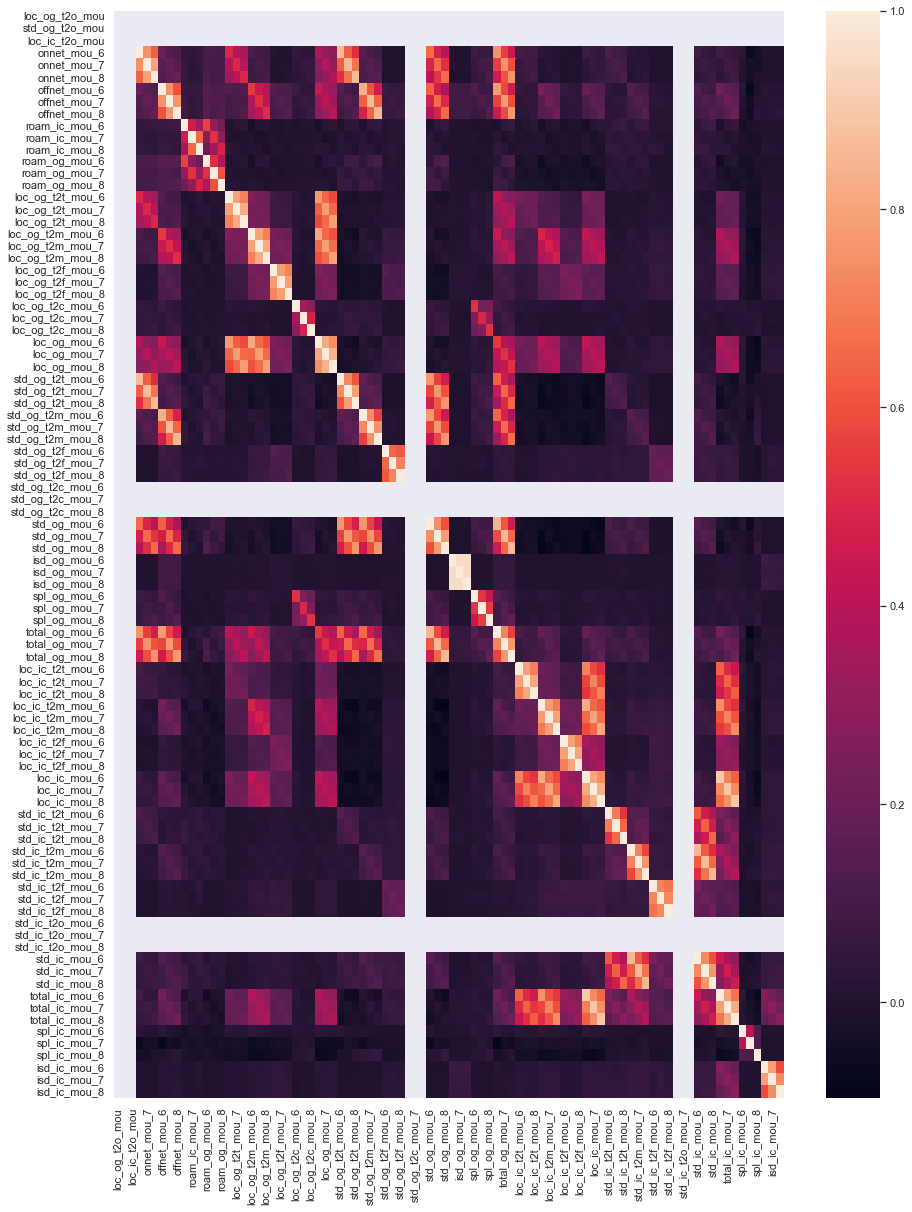

In [350]:
sns.heatmap(set1.corr())

<AxesSubplot:>

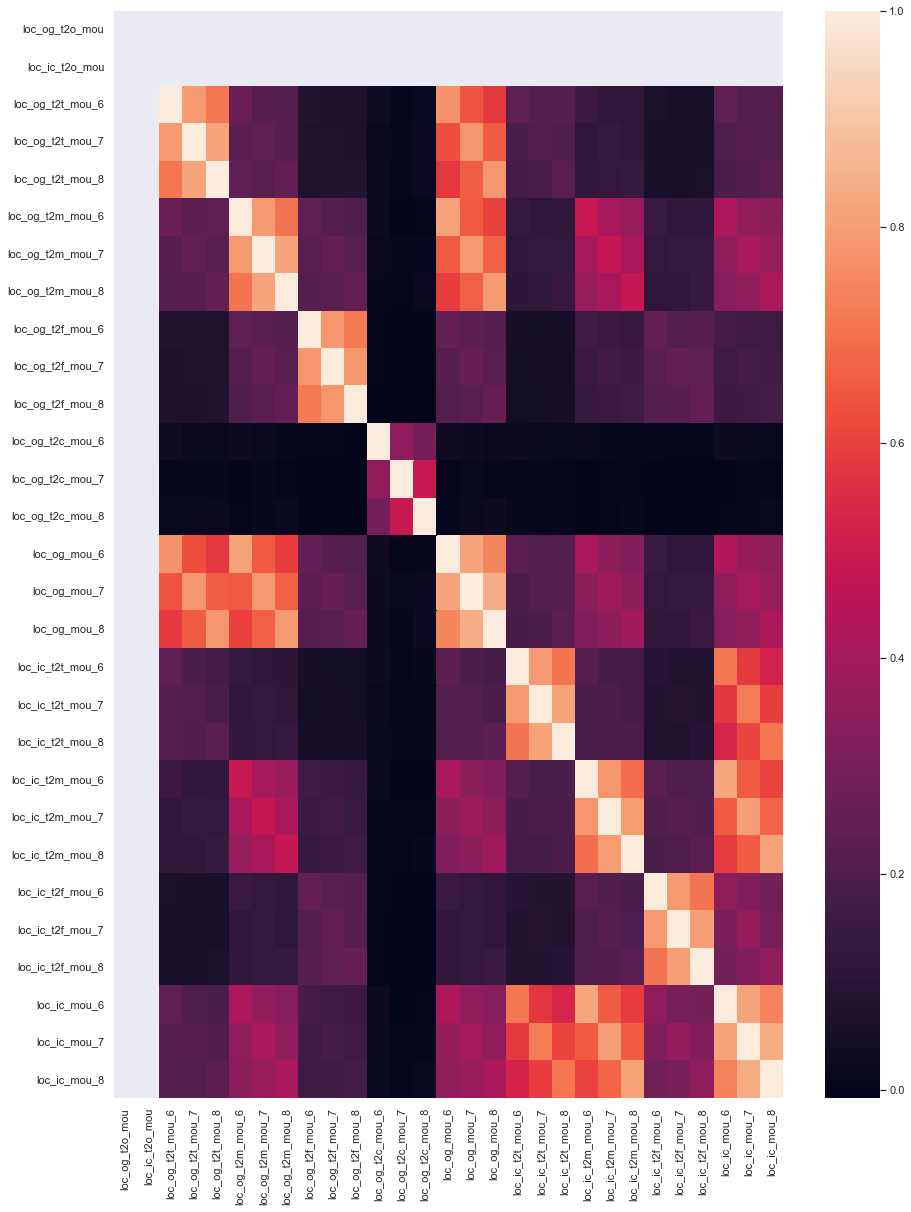

In [351]:
filter_col = [col for col in train_df if 'loc' in col]
set2= train_df[filter_col]
sns.heatmap(set2.corr())

<AxesSubplot:>

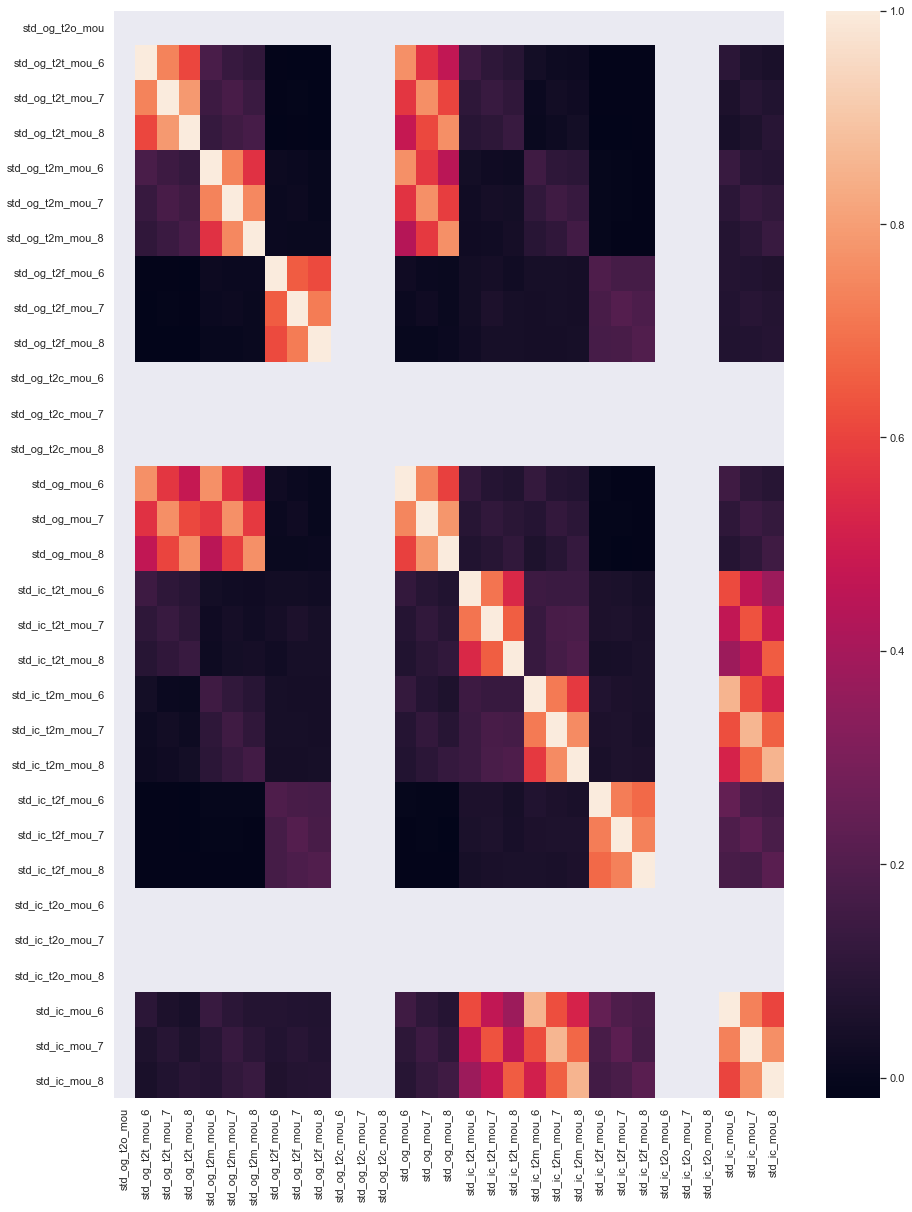

In [352]:
filter_col = [col for col in train_df if 'std' in col]
set3= train_df[filter_col]
sns.heatmap(set3.corr())

<AxesSubplot:>

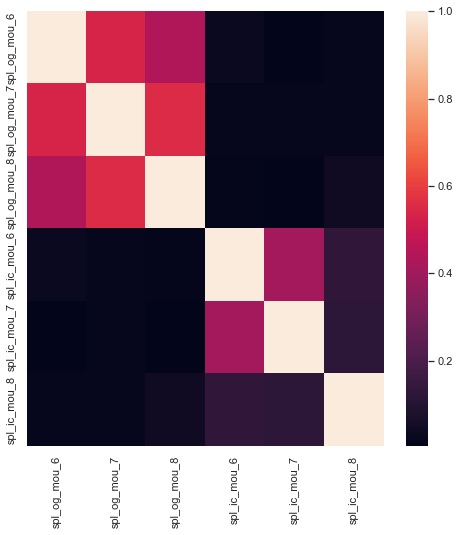

In [353]:
plt.figure(figsize=(8,8))
filter_col = [col for col in train_df if 'spl' in col]
set4= train_df[filter_col]
sns.heatmap(set4.corr())

<AxesSubplot:>

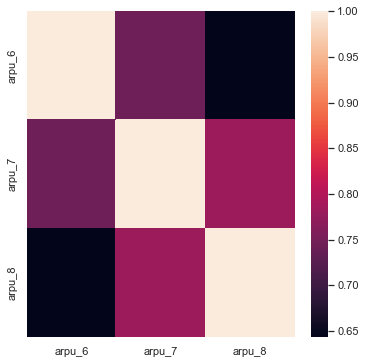

In [354]:
plt.figure(figsize=(6,6))
filter_col = ['arpu_6','arpu_7','arpu_8']
set5= train_df[filter_col]
sns.heatmap(set5.corr())

<AxesSubplot:>

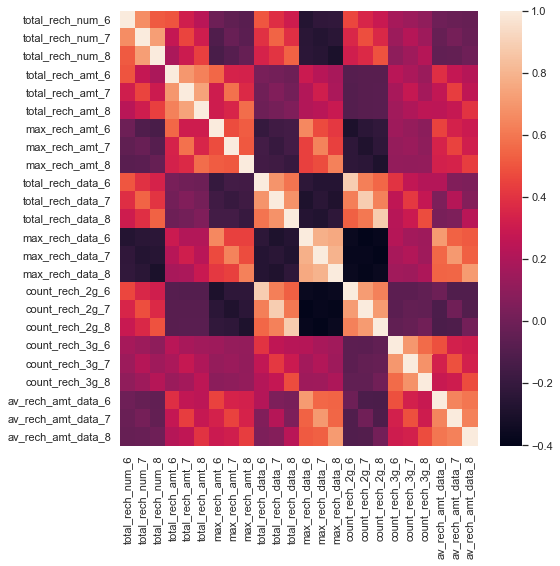

In [355]:
plt.figure(figsize=(8,8))
filter_col = [col for col in train_df if 'rech' in col]
set6= train_df[filter_col]
sns.heatmap(set6.corr())

<AxesSubplot:>

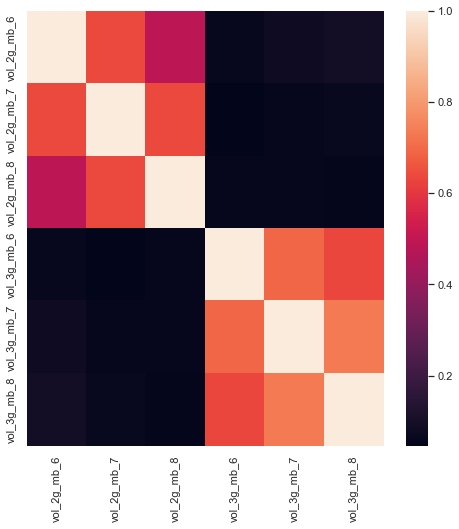

In [356]:
plt.figure(figsize=(8,8))
filter_col = [col for col in train_df if 'vol' in col]
set7= train_df[filter_col]
sns.heatmap(set7.corr())

<br>
## <font color='green'> Data Preparation-Step1 || Find Missing values </font>

In [357]:
percentage_missing = train_df.isnull().sum()/train_df.shape[0] *100
missing_value_df = pd.DataFrame({'Column_name':train_df.columns,
                                'Percentage_missing':percentage_missing})
missing_value_df.sort_values(by=['Percentage_missing'],inplace=True,ascending=False)
missing_value_df.shape

(172, 2)

In [358]:
missing_value_df[missing_value_df['Percentage_missing'] > 70]

,Column_name,Percentage_missing
arpu_3g_6,arpu_3g_6,74.902499
count_rech_2g_6,count_rech_2g_6,74.902499
night_pck_user_6,night_pck_user_6,74.902499
arpu_2g_6,arpu_2g_6,74.902499
date_of_last_rech_data_6,date_of_last_rech_data_6,74.902499
total_rech_data_6,total_rech_data_6,74.902499
av_rech_amt_data_6,av_rech_amt_data_6,74.902499
max_rech_data_6,max_rech_data_6,74.902499
count_rech_3g_6,count_rech_3g_6,74.902499
fb_user_6,fb_user_6,74.902499


<br>
## <font color='green'> Data Preparation-Step2 ||Retaining columns where not-NAN values are minimum 80%</font>

In [359]:
train_df.dropna(axis=1, thresh=train_df.shape[0]*0.8,inplace=True)

In [360]:
train_df.shape

(69999, 142)

In [361]:
#Commentary :
# night_pck_user_6, night_pck_user_7, night_pck_user_8 has missing value % of more than 73% 
# Hence it is not adding any value. Hence drop all 3 of them


#Commentary :
# fb_user_6, fb_user_7 & fb_user_8 has has missing value % of more than 73% 
# Hence it is not adding any value. Hence drop all 3 of them

#Commentary :
# 'arpu_2g_6','arpu_2g_7','arpu_2g_8','arpu_3g_6','arpu_3g_7','arpu_3g_8' has has missing value % of more than 73% 
# Hence it is not adding any value. Further 'arpu_6','arpu_7','arpu_8' are available with no missing values for these 3 columns.
# Hence drop - arpu_2g_6','arpu_2g_7','arpu_2g_8','arpu_3g_6','arpu_3g_7','arpu_3g_8'

#Commentary :
# count_rech_2g_6, count_rech_2g_7, count_rech_2g_8,  has has missing value % of more than 73% 
# Hence it is not adding any value. Hence drop all 3 of them

# count_rech_3g_6, count_rech_3g_7, count_rech_3g_8,  has has missing value % of more than 73% 
# Hence it is not adding any value. Hence drop all 3 of them

# total_rech_data_6, total_rech_data_7, total_rech_data_8,  has has missing value % of more than 73% 
# Hence it is not adding any value. Hence drop all 3 of them

# av_rech_amt_data_6, av_rech_amt_data_7 & av_rech_amt_data_8 has has missing value % of more than 73% 
# Hence it is not adding any value. Hence drop all 3 of them

# max_rech_data_6, max_rech_data_7 & max_rech_data_8 has has missing value % of more than 73% 
# Hence it is not adding any value. Hence drop all 3 of them

# date_of_last_rech_data_6, date_of_last_rech_data_7 & date_of_last_rech_data_8 has has missing value % of more than 73% 
# Hence it is not adding any value. Hence drop all 3 of them



<br>
## <font color='green'> Data Preparation-Step3 || Find Missing values again after Step 2 & Imputing them </font>

In [362]:
percentage_missing = train_df.isnull().sum()/train_df.shape[0] *100
missing_value_df = pd.DataFrame({'Column_name':train_df.columns,
                                'Percentage_missing':percentage_missing})
missing_value_df.sort_values(by=['Percentage_missing'],inplace=True,ascending=False)
missing_value_df[missing_value_df['Percentage_missing'] > 0]

,Column_name,Percentage_missing
roam_og_mou_8,roam_og_mou_8,5.290076
og_others_8,og_others_8,5.290076
spl_og_mou_8,spl_og_mou_8,5.290076
loc_ic_t2t_mou_8,loc_ic_t2t_mou_8,5.290076
loc_og_t2m_mou_8,loc_og_t2m_mou_8,5.290076
loc_og_t2c_mou_8,loc_og_t2c_mou_8,5.290076
loc_ic_t2m_mou_8,loc_ic_t2m_mou_8,5.290076
loc_og_t2t_mou_8,loc_og_t2t_mou_8,5.290076
loc_ic_t2f_mou_8,loc_ic_t2f_mou_8,5.290076
std_og_t2f_mou_8,std_og_t2f_mou_8,5.290076


In [363]:
#There are 95 columns in the train dataset that have percentage missing > 0
missing_value_df[missing_value_df['Percentage_missing'] > 0].shape

(95, 2)

In [364]:
#There are 27 columns in the train dataset that are related to 'Call minutes for June month' & have percentage missing > 0
missing_value_df[missing_value_df['Column_name'].str.contains('mou_6') & (missing_value_df['Percentage_missing'] > 0)].shape

(27, 2)

In [365]:
#There are 27 columns in the train dataset that are related to 'Call minutes for July month' & have percentage missing > 0
missing_value_df[missing_value_df['Column_name'].str.contains('mou_7') & (missing_value_df['Percentage_missing'] > 0)].shape

(27, 2)

In [366]:
#There are 27 columns in the train dataset that are related to 'Call minutes for August month' & have percentage missing > 0

missing_value_df[missing_value_df['Column_name'].str.contains('mou_8') & (missing_value_df['Percentage_missing'] > 0)].shape

(27, 2)

In [367]:
# Viewing 7 columns in the train dataset that are related to 'Call minutes for June month' & have percentage missing > 0
missing_value_df[missing_value_df['Column_name'].str.contains('mou_6') & (missing_value_df['Percentage_missing'] > 0)]
#PLease note same columns have missing value for July and August month, hence not explicitly printed.

,Column_name,Percentage_missing
isd_og_mou_6,isd_og_mou_6,3.954342
spl_og_mou_6,spl_og_mou_6,3.954342
std_og_mou_6,std_og_mou_6,3.954342
loc_ic_t2f_mou_6,loc_ic_t2f_mou_6,3.954342
loc_ic_t2t_mou_6,loc_ic_t2t_mou_6,3.954342
loc_ic_t2m_mou_6,loc_ic_t2m_mou_6,3.954342
loc_ic_mou_6,loc_ic_mou_6,3.954342
std_ic_t2t_mou_6,std_ic_t2t_mou_6,3.954342
std_ic_t2m_mou_6,std_ic_t2m_mou_6,3.954342
std_ic_t2f_mou_6,std_ic_t2f_mou_6,3.954342


In [368]:
# MOU : This indicates Minutes of usage - voice calls, 
#If any fields for this column are blank, it is safe to assume that no calls were actually made.
#Hence, imputing "mou_6" specific columns with 0 value. 

train_df['spl_ic_mou_6'].fillna(value=0,inplace=True)
train_df['std_og_t2c_mou_6'].fillna(value=0,inplace=True)
train_df['std_og_mou_6'].fillna(value=0,inplace=True)
train_df['isd_ic_mou_6'].fillna(value=0,inplace=True)
train_df['isd_og_mou_6'].fillna(value=0,inplace=True)
train_df['std_ic_t2m_mou_6'].fillna(value=0,inplace=True)

train_df['spl_og_mou_6'].fillna(value=0,inplace=True)
train_df['std_ic_t2t_mou_6'].fillna(value=0,inplace=True)
train_df['loc_ic_t2t_mou_6'].fillna(value=0,inplace=True)
train_df['isd_ic_mou_6'].fillna(value=0,inplace=True)
train_df['std_ic_t2o_mou_6'].fillna(value=0,inplace=True)
train_df['loc_ic_t2m_mou_6'].fillna(value=0,inplace=True)

train_df['std_ic_t2f_mou_6'].fillna(value=0,inplace=True)
train_df['loc_ic_mou_6'].fillna(value=0,inplace=True)
train_df['loc_ic_t2t_mou_6'].fillna(value=0,inplace=True)
train_df['offnet_mou_6'].fillna(value=0,inplace=True)
train_df['onnet_mou_6'].fillna(value=0,inplace=True)
train_df['loc_og_t2m_mou_6'].fillna(value=0,inplace=True)

train_df['roam_og_mou_6'].fillna(value=0,inplace=True)
train_df['loc_og_t2f_mou_6'].fillna(value=0,inplace=True)
train_df['roam_ic_mou_6'].fillna(value=0,inplace=True)
train_df['std_og_t2f_mou_6'].fillna(value=0,inplace=True)
train_df['loc_og_t2c_mou_6'].fillna(value=0,inplace=True)
train_df['loc_og_mou_6'].fillna(value=0,inplace=True)

train_df['loc_og_t2t_mou_6'].fillna(value=0,inplace=True)
train_df['std_og_t2t_mou_6'].fillna(value=0,inplace=True)
train_df['std_og_t2m_mou_6'].fillna(value=0,inplace=True)
train_df['total_og_mou_6'].fillna(value=0,inplace=True)
train_df['total_ic_mou_6'].fillna(value=0,inplace=True)

train_df['loc_ic_t2f_mou_6'].fillna(value=0,inplace=True)
train_df['std_ic_mou_6'].fillna(value=0,inplace=True)


In [369]:
missing_value_df[missing_value_df['Column_name'].str.contains('mou_7') & (missing_value_df['Percentage_missing'] > 0)]

,Column_name,Percentage_missing
std_ic_t2o_mou_7,std_ic_t2o_mou_7,3.838626
onnet_mou_7,onnet_mou_7,3.838626
std_ic_t2f_mou_7,std_ic_t2f_mou_7,3.838626
loc_og_t2t_mou_7,loc_og_t2t_mou_7,3.838626
std_ic_mou_7,std_ic_mou_7,3.838626
std_ic_t2m_mou_7,std_ic_t2m_mou_7,3.838626
spl_ic_mou_7,spl_ic_mou_7,3.838626
roam_ic_mou_7,roam_ic_mou_7,3.838626
std_ic_t2t_mou_7,std_ic_t2t_mou_7,3.838626
isd_ic_mou_7,isd_ic_mou_7,3.838626


In [370]:
# MOU : This indicates Minutes of usage - voice calls, 
#If any fields for this column are blank, it is safe to assume that no calls were actually made.
#Hence, imputing "mou_7" specific columns with 0 value. 

train_df['spl_ic_mou_7'].fillna(value=0,inplace=True)
train_df['std_og_t2c_mou_7'].fillna(value=0,inplace=True)
train_df['std_og_mou_7'].fillna(value=0,inplace=True)
train_df['isd_ic_mou_7'].fillna(value=0,inplace=True)
train_df['isd_og_mou_7'].fillna(value=0,inplace=True)
train_df['std_ic_t2m_mou_7'].fillna(value=0,inplace=True)

train_df['spl_og_mou_7'].fillna(value=0,inplace=True)
train_df['std_ic_t2t_mou_7'].fillna(value=0,inplace=True)
train_df['loc_ic_t2t_mou_7'].fillna(value=0,inplace=True)
train_df['isd_ic_mou_7'].fillna(value=0,inplace=True)
train_df['std_ic_t2o_mou_7'].fillna(value=0,inplace=True)
train_df['loc_ic_t2m_mou_7'].fillna(value=0,inplace=True)

train_df['std_ic_t2f_mou_7'].fillna(value=0,inplace=True)
train_df['loc_ic_mou_7'].fillna(value=0,inplace=True)
train_df['loc_ic_t2t_mou_7'].fillna(value=0,inplace=True)
train_df['offnet_mou_7'].fillna(value=0,inplace=True)
train_df['onnet_mou_7'].fillna(value=0,inplace=True)
train_df['loc_og_t2m_mou_7'].fillna(value=0,inplace=True)

train_df['roam_og_mou_7'].fillna(value=0,inplace=True)
train_df['loc_og_t2f_mou_7'].fillna(value=0,inplace=True)
train_df['roam_ic_mou_7'].fillna(value=0,inplace=True)
train_df['std_og_t2f_mou_7'].fillna(value=0,inplace=True)
train_df['loc_og_t2c_mou_7'].fillna(value=0,inplace=True)
train_df['loc_og_mou_7'].fillna(value=0,inplace=True)

train_df['loc_og_t2t_mou_7'].fillna(value=0,inplace=True)
train_df['std_og_t2t_mou_7'].fillna(value=0,inplace=True)
train_df['std_og_t2m_mou_7'].fillna(value=0,inplace=True)
train_df['total_og_mou_7'].fillna(value=0,inplace=True)
train_df['total_ic_mou_7'].fillna(value=0,inplace=True)

train_df['loc_ic_t2f_mou_7'].fillna(value=0,inplace=True)
train_df['std_ic_mou_7'].fillna(value=0,inplace=True)


In [371]:
missing_value_df[missing_value_df['Column_name'].str.contains('mou_8') & (missing_value_df['Percentage_missing'] > 0)]

,Column_name,Percentage_missing
roam_og_mou_8,roam_og_mou_8,5.290076
spl_og_mou_8,spl_og_mou_8,5.290076
loc_ic_t2t_mou_8,loc_ic_t2t_mou_8,5.290076
loc_og_t2m_mou_8,loc_og_t2m_mou_8,5.290076
loc_og_t2c_mou_8,loc_og_t2c_mou_8,5.290076
loc_ic_t2m_mou_8,loc_ic_t2m_mou_8,5.290076
loc_og_t2t_mou_8,loc_og_t2t_mou_8,5.290076
loc_ic_t2f_mou_8,loc_ic_t2f_mou_8,5.290076
std_og_t2f_mou_8,std_og_t2f_mou_8,5.290076
loc_ic_mou_8,loc_ic_mou_8,5.290076


In [372]:
# MOU : This indicates Minutes of usage - voice calls, 
#If any fields for this column are blank, it is safe to assume that no calls were actually made.
#Hence, imputing "mou_7" specific columns with 0 value. 

train_df['spl_ic_mou_8'].fillna(value=0,inplace=True)
train_df['std_og_t2c_mou_8'].fillna(value=0,inplace=True)
train_df['std_og_mou_8'].fillna(value=0,inplace=True)
train_df['isd_ic_mou_8'].fillna(value=0,inplace=True)
train_df['isd_og_mou_8'].fillna(value=0,inplace=True)
train_df['std_ic_t2m_mou_8'].fillna(value=0,inplace=True)

train_df['spl_og_mou_8'].fillna(value=0,inplace=True)
train_df['std_ic_t2t_mou_8'].fillna(value=0,inplace=True)
train_df['loc_ic_t2t_mou_8'].fillna(value=0,inplace=True)
train_df['isd_ic_mou_8'].fillna(value=0,inplace=True)
train_df['std_ic_t2o_mou_8'].fillna(value=0,inplace=True)
train_df['loc_ic_t2m_mou_8'].fillna(value=0,inplace=True)

train_df['std_ic_t2f_mou_8'].fillna(value=0,inplace=True)
train_df['loc_ic_mou_8'].fillna(value=0,inplace=True)
train_df['loc_ic_t2t_mou_8'].fillna(value=0,inplace=True)
train_df['offnet_mou_8'].fillna(value=0,inplace=True)
train_df['onnet_mou_8'].fillna(value=0,inplace=True)
train_df['loc_og_t2m_mou_8'].fillna(value=0,inplace=True)

train_df['roam_og_mou_8'].fillna(value=0,inplace=True)
train_df['loc_og_t2f_mou_8'].fillna(value=0,inplace=True)
train_df['roam_ic_mou_8'].fillna(value=0,inplace=True)
train_df['std_og_t2f_mou_8'].fillna(value=0,inplace=True)
train_df['loc_og_t2c_mou_8'].fillna(value=0,inplace=True)
train_df['loc_og_mou_8'].fillna(value=0,inplace=True)

train_df['loc_og_t2t_mou_8'].fillna(value=0,inplace=True)
train_df['std_og_t2t_mou_8'].fillna(value=0,inplace=True)
train_df['std_og_t2m_mou_8'].fillna(value=0,inplace=True)
train_df['total_og_mou_8'].fillna(value=0,inplace=True)
train_df['total_ic_mou_8'].fillna(value=0,inplace=True)

train_df['loc_ic_t2f_mou_8'].fillna(value=0,inplace=True)
train_df['std_ic_mou_8'].fillna(value=0,inplace=True)


In [373]:
# MOU : This indicates Minutes of usage - voice calls, 
#If any fields for this column are blank, it is safe to assume that no calls were actually made.
#Hence, imputing below "mou" specific columns with 0 value. 
train_df['loc_ic_t2o_mou'].fillna(value=0,inplace=True)
train_df['std_og_t2o_mou'].fillna(value=0,inplace=True)
train_df['loc_og_t2o_mou'].fillna(value=0,inplace=True)

In [374]:
train_df['ic_others_6'].fillna(value=0,inplace=True)
train_df['ic_others_7'].fillna(value=0,inplace=True)
train_df['ic_others_8'].fillna(value=0,inplace=True)
train_df['og_others_6'].fillna(value=0,inplace=True)
train_df['og_others_7'].fillna(value=0,inplace=True)
train_df['og_others_8'].fillna(value=0,inplace=True)

In [375]:
train_df['last_date_of_month_7'].value_counts()

7/31/2014    69600
Name: last_date_of_month_7, dtype: int64

In [376]:
#Last Date of month is static column as it simply stores last date of respective month. 
# As last_date_of_month_7 and last_date_of_month_8 have some missing values. 
# Best approach is to impute them using most common value = Mode
train_df['last_date_of_month_7'].fillna(value=train_df['last_date_of_month_7'].mode()[0], inplace=True)
train_df['last_date_of_month_8'].fillna(value=train_df['last_date_of_month_8'].mode()[0], inplace=True)

In [377]:
#Last Date of month is static column as it simply stores last date of respective month. 
# As date_of_last_rech_6 and date_of_last_rech_7 and date_of_last_rech_8 have some missing values. 
# Best approach is to impute them using most common value = Mode
train_df['date_of_last_rech_6'].fillna(value=train_df['date_of_last_rech_6'].mode()[0], inplace=True)
train_df['date_of_last_rech_7'].fillna(value=train_df['date_of_last_rech_7'].mode()[0], inplace=True)
train_df['date_of_last_rech_8'].fillna(value=train_df['date_of_last_rech_8'].mode()[0], inplace=True)

In [378]:
#Finidng % missing values for all columns again to see the change after Missing value imputation that we carried out above
percentage_missing = train_df.isnull().sum()/train_df.shape[0] *100
missing_value_df = pd.DataFrame({'Column_name':train_df.columns,
                                'Percentage_missing':percentage_missing})
missing_value_df.sort_values(by=['Percentage_missing'],inplace=True,ascending=False)

missing_value_df[missing_value_df['Percentage_missing'] > 0]

,Column_name,Percentage_missing


In [379]:
train_df.shape

(69999, 142)

## <font color='green'>Data Preparation-Step4 || Feature Engineering - Deriving new columns and removing redundant columns</font>

In [380]:
#Creating new variable that identifies the average days (Across June, July, August) a customer recharges earlier compared to final date.
# The bigger the value, it indicates high chances that customer is active member 
# and is recharging well ahead of plan expiry to avoid disruption of cellular plan
train_df['diff_6']  = pd.to_datetime(train_df['last_date_of_month_6']).dt.day - pd.to_datetime(train_df['date_of_last_rech_6']).dt.day
train_df['diff_7']  = pd.to_datetime(train_df['last_date_of_month_7']).dt.day - pd.to_datetime(train_df['date_of_last_rech_7']).dt.day
train_df['diff_8']  = pd.to_datetime(train_df['last_date_of_month_8']).dt.day - pd.to_datetime(train_df['date_of_last_rech_8']).dt.day

In [381]:
train_df['diff_avg'] = (train_df['diff_6'] + train_df['diff_7'] + train_df['diff_8']) / 3
train_df['diff_avg']

61873     5.000000
34647     7.666667
42002    14.333333
35624     1.333333
62142     7.666667
           ...    
7887      6.666667
16333     6.333333
62848     1.666667
33039     1.666667
37882     5.333333
Name: diff_avg, Length: 69999, dtype: float64

In [382]:
train_df.shape

(69999, 146)

In [383]:
train_df.drop(columns=['last_date_of_month_6','last_date_of_month_7','last_date_of_month_8','date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8','diff_6','diff_7','diff_8'], inplace=True)
train_df.drop(columns=['id','circle_id'],inplace=True)

In [384]:
train_df.shape

(69999, 135)

In [385]:
categorical_df = train_df.select_dtypes(include=['object'])
numerical_df = train_df.select_dtypes(include=['int64','int32','float32','float64'])

In [386]:
categorical_df.shape, numerical_df.shape

((69999, 0), (69999, 135))

<br>
## <font color='green'> Data Preparation-Step5 || Outlier Analysis & Treatment </font>

In [387]:
#Performing outlier analysis by removing  observations above specifc threhold
train_df['total_ic_mou_8'].describe()

count    69999.000000
mean       198.486034
std        288.336731
min          0.000000
25%         38.290000
50%        114.610000
75%        249.710000
max      10830.380000
Name: total_ic_mou_8, dtype: float64

In [388]:
np.quantile(a=train_df['total_ic_mou_8'],q=0.98)

1020.1131999999994

In [389]:
train_df = train_df[train_df['total_ic_mou_8'] < 1020]
train_df.shape

(68598, 135)

In [390]:
# Performing outlier analysis by removing  observations above specifc threhold
train_df['total_og_mou_8'].describe()

count    68598.000000
mean       298.258599
std        471.754358
min          0.000000
25%         37.430000
50%        135.590000
75%        362.660000
max      14043.060000
Name: total_og_mou_8, dtype: float64

In [391]:
np.quantile(a=train_df['total_og_mou_8'],q=0.98)

1726.2043999999994

In [392]:
train_df = train_df[train_df['total_og_mou_8'] < 1750]
train_df.shape

(67268, 135)

In [393]:
#Performing outlier analysis by removing  observations above specifc threhold and also removing negative values.
#Logically, average revenue per user can never be negative, hence filtering out such observations
train_df['arpu_8'].describe()

count    67268.000000
mean       254.630367
std        281.709578
min       -491.545000
25%         80.983000
50%        184.192000
75%        349.325000
max      19295.904000
Name: arpu_8, dtype: float64

In [394]:
np.quantile(a=train_df['arpu_8'],q=0.98)

949.4048800000011

In [395]:
train_df[train_df['arpu_8'] < 0]['arpu_8']

20814    -5.000
15388   -25.386
54006    -5.000
25215    -5.000
41644    -5.000
          ...  
69109    -6.503
64436    -5.000
50210   -10.220
6101     -1.000
53680   -18.028
Name: arpu_8, Length: 350, dtype: float64

In [396]:
train_df = train_df[(train_df['arpu_8'] >= 0) & (train_df['arpu_8'] < 950)]
train_df.shape

(65575, 135)

In [397]:
#Performing outlier analysis by removing  observations above specifc threhold
train_df['total_rech_amt_8'].describe()

count    65575.000000
mean       270.660221
std        247.437915
min          0.000000
25%         87.000000
50%        207.000000
75%        397.000000
max       4449.000000
Name: total_rech_amt_8, dtype: float64

In [398]:
np.quantile(a=train_df['total_rech_amt_8'],q=0.98)

936.0

In [399]:
train_df = train_df[train_df['total_rech_amt_8'] < 950]
train_df.shape

(64359, 135)

In [400]:
# Performing outlier analysis by removing  observations above specifc threhold
train_df['loc_ic_t2t_mou_8'].describe()

count    64359.000000
mean        34.218218
std         63.784904
min          0.000000
25%          1.730000
50%         12.740000
75%         39.030000
max        973.360000
Name: loc_ic_t2t_mou_8, dtype: float64

In [401]:
np.quantile(a=train_df['loc_ic_t2t_mou_8'],q=0.98)

223.90679999999992

In [402]:
train_df = train_df[train_df['loc_ic_t2t_mou_8'] < 230]
train_df.shape

(63139, 135)

In [403]:
#Performing outlier analysis by removing  observations above specifc threhold
train_df['loc_ic_t2m_mou_8'].describe()

count    63139.000000
mean        85.744193
std        111.551372
min          0.000000
25%         12.180000
50%         47.890000
75%        115.130000
max        994.310000
Name: loc_ic_t2m_mou_8, dtype: float64

In [404]:
np.quantile(a=train_df['loc_ic_t2m_mou_8'], q=0.98)

437.0019999999994

In [405]:
train_df = train_df[train_df['loc_ic_t2m_mou_8'] < 450]
train_df.shape

(61978, 135)

In [406]:
#Performing outlier analysis by removing  observations above specifc threhold and also removing negative values.
#Logically, average revenue per user can never be negative, hence filtering out such observations
train_df['arpu_7'].describe()

count    61978.000000
mean       230.931541
std        216.252005
min       -897.035000
25%         80.242500
50%        173.857500
75%        320.272500
max       6453.689000
Name: arpu_7, dtype: float64

In [407]:
np.quantile(a=train_df['arpu_7'], q=0.98)

813.2316999999999

In [408]:
train_df = train_df[(train_df['arpu_7'] >= 0) & (train_df['arpu_7'] < 850)]
train_df.shape

(60618, 135)

In [409]:
#Performing outlier analysis by removing  observations above specifc threhold and also removing negative values.
#Logically, average revenue per user can never be negative, hence filtering out such observations
train_df['arpu_6'].describe()

count    60618.000000
mean       234.536295
std        217.035790
min       -160.795000
25%         86.571000
50%        179.363000
75%        323.266500
max      11505.508000
Name: arpu_6, dtype: float64

In [410]:
np.quantile(a=train_df['arpu_6'], q=0.98)

813.9502799999993

In [411]:
train_df = train_df[(train_df['arpu_6'] >= 0) & (train_df['arpu_6'] < 850)]
train_df.shape

(59359, 135)

In [412]:
#Performing outlier analysis by removing  observations above specifc threhold and also removing negative values.
train_df['total_rech_amt_7'].describe()

count    59359.000000
mean       246.103826
std        216.866363
min          0.000000
25%         90.000000
50%        200.000000
75%        360.000000
max       3450.000000
Name: total_rech_amt_7, dtype: float64

In [413]:
np.quantile(a=train_df['total_rech_amt_7'], q=0.98)

822.0

In [414]:
train_df = train_df[train_df['total_rech_amt_7'] < 850]
train_df.shape

(58419, 135)

In [415]:
#Performing outlier analysis by removing  observations above specifc threhold and also removing negative values.
train_df['total_rech_amt_6'].describe()

count    58419.000000
mean       250.018145
std        213.634033
min          0.000000
25%         96.000000
50%        200.000000
75%        360.000000
max       3600.000000
Name: total_rech_amt_6, dtype: float64

In [416]:
np.quantile(a=train_df['total_rech_amt_6'], q=0.98)

817.0

In [417]:
train_df = train_df[train_df['total_rech_amt_6'] < 850]
train_df.shape

(57516, 135)

In [418]:
#Performing outlier analysis by removing  observations above specifc threhold and also removing negative values.
train_df['total_rech_num_6'].describe()

count    57516.000000
mean         6.697823
std          5.704567
min          0.000000
25%          3.000000
50%          5.000000
75%          8.000000
max         88.000000
Name: total_rech_num_6, dtype: float64

In [419]:
np.quantile(a=train_df['total_rech_num_6'], q=0.98)

24.0

In [420]:
train_df = train_df[train_df['total_rech_num_6'] < 25]
train_df.shape

(56445, 135)

In [421]:
#Performing outlier analysis by removing  observations above specifc threhold and also removing negative values.
train_df['total_rech_num_7'].describe()

count    56445.000000
mean         6.586040
std          5.069948
min          0.000000
25%          3.000000
50%          5.000000
75%          8.000000
max         64.000000
Name: total_rech_num_7, dtype: float64

In [422]:
np.quantile(a=train_df['total_rech_num_7'], q=0.98)

21.0

In [423]:
train_df = train_df[train_df['total_rech_num_7'] < 25]
train_df.shape

(55832, 135)

In [424]:
#Performing outlier analysis by removing  observations above specifc threhold and also removing negative values.
train_df['total_rech_num_8'].describe()

count    55832.000000
mean         6.088157
std          5.153158
min          0.000000
25%          3.000000
50%          5.000000
75%          8.000000
max         61.000000
Name: total_rech_num_8, dtype: float64

In [425]:
np.quantile(a=train_df['total_rech_num_8'], q=0.98)

21.0

In [426]:
train_df = train_df[train_df['total_rech_num_8'] < 25]
train_df.shape

(55270, 135)

# Splitting Training dataset into Train-Validation sub datasets

In [427]:
# As we don't have any test dataset and test results available with us, 
# Also, given the fact that there are large number of observations - 70K observations
# We will create an internal split of train.csv into Training dataset & validation dataset
# Validation dataset will be used/act like test dataset for us and which we can use to do hyperparameter tuning.

In [428]:
y = train_df.pop('churn_probability')
X = train_df
X_train, X_validation, y_train, y_validation = train_test_split(X, y, train_size=0.7, random_state=100)
X_train.shape, y_train.shape, X_validation.shape, y_validation.shape

((38689, 134), (38689,), (16581, 134), (16581,))

In [429]:
X_train.head(2)

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,diff_avg
55036,0.0,0.0,0.0,104.520,58.660,51.022,61.91,28.98,43.83,82.58,44.66,97.89,0.0,0.0,0.0,0.0,0.0,0.0,61.91,28.98,43.83,74.04,20.64,92.39,0.00,5.23,0.0,0.0,0.0,0.0,135.96,54.86,136.23,0.0,0.0,0.0,5.91,18.78,0.0,0.0,0.0,5.5,0.0,0.0,0.0,5.91,18.78,5.5,0.0,0.0,0.0,2.61,0.00,0.0,0.0,0.0,0.0,144.49,73.64,141.73,58.16,25.11,68.16,84.43,65.53,147.46,3.30,1.01,2.50,145.89,91.66,218.13,0.0,0.00,0.0,1.91,0.0,0.0,0.0,0.0,1.88,0.0,0.0,0.0,1.91,0.00,1.88,147.96,93.79,222.08,0.14,0.0,0.0,0.0,0.0,0.0,0.0,2.13,2.06,2,1,2,0,0,398,0,0,398,0,0,398,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,2243,0.0,0.0,0.0,23.666667
41265,0.0,0.0,0.0,50.445,60.789,30.772,12.23,25.44,13.88,20.91,18.38,11.03,0.0,0.0,0.0,0.0,0.0,0.0,12.23,25.44,13.88,20.56,12.33,11.03,0.35,6.04,0.0,0.0,0.0,0.0,33.14,43.83,24.91,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.53,0.0,0.0,0.0,0.0,33.14,44.36,24.91,81.96,45.76,82.26,34.21,53.86,50.13,6.01,65.89,27.64,122.19,165.53,160.04,0.0,1.63,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,1.63,0.00,122.19,167.16,160.04,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,3,5,4,50,110,260,50,110,130,0,0,130,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,3109,0.0,0.0,0.0,3.666667


In [430]:
y_train.head(2)

55036    0
41265    0
Name: churn_probability, dtype: int64

In [431]:
X_validation.head(2)

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,diff_avg
67457,0.0,0.0,0.0,84.010,78.563,44.742,29.99,7.28,10.36,55.96,68.44,29.34,0.00,0.0,0.0,0.00,0.0,0.0,29.99,7.28,10.36,41.08,67.26,26.44,2.88,1.18,2.9,0.00,0.0,0.0,73.96,75.73,39.71,0.00,0.00,0.0,12.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,85.96,75.73,39.71,20.24,17.01,25.86,147.69,152.31,102.03,34.74,4.46,4.38,202.69,173.79,132.28,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,202.69,173.79,132.28,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,4,3,0,100,100,0,50,50,0,50,50,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,1113,0.0,0.0,0.0,7.000000
57435,0.0,0.0,0.0,323.482,22.550,0.000,215.39,8.71,0.00,420.43,16.58,0.00,1.43,0.0,0.0,2.56,0.0,0.0,17.74,2.33,0.00,24.36,0.81,0.00,0.00,0.00,0.0,1.93,0.0,0.0,42.11,3.15,0.00,195.08,6.38,0.0,387.46,15.76,0.0,0.0,0.0,0.0,0.0,0.0,0.0,582.54,22.15,0.0,0.0,0.0,0.0,8.6,0.0,0.0,0.0,0.0,0.0,633.26,25.30,0.00,3.44,0.35,0.00,10.46,0.00,0.00,0.00,0.00,0.00,13.91,0.35,0.00,1.18,0.0,0.0,2.78,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.96,0.0,0.0,18.18,0.35,0.00,0.3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11,4,2,406,0,0,110,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,1293,0.0,0.0,0.0,5.666667


In [432]:
y_validation.head(2)

67457    0
57435    0
Name: churn_probability, dtype: int64

In [433]:
from imblearn.over_sampling import SMOTE

# Standard Scaling before PCA

What is Standardization? <br><br>
Standardization is another scaling technique where the values are centered around the mean with a unit standard deviation. This means that the mean of the attribute becomes zero and the resultant distribution has a unit standard deviation.
<br><br>
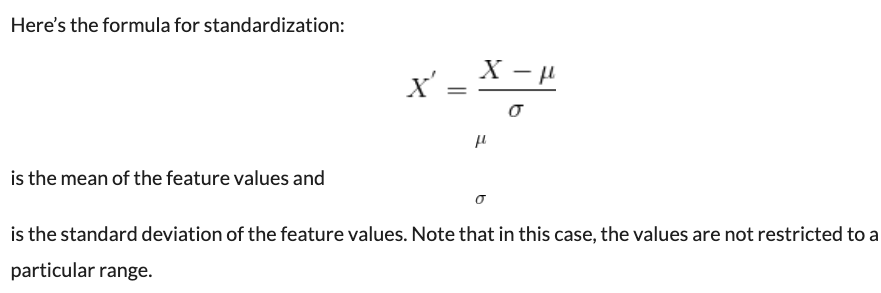

In [434]:
#scaler = MinMaxScaler()
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train))
X_validation_scaled = pd.DataFrame(scaler.transform(X_validation))


In [435]:
X_train_scaled.head(2)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133
0,0.0,0.0,0.0,-0.624834,-0.878307,-0.899275,-0.131303,-0.315429,-0.222383,-0.285442,-0.480811,-0.165700,-0.16632,-0.109442,-0.117707,-0.234647,-0.197413,-0.193708,0.365705,-0.001904,0.239445,0.081502,-0.466498,0.322802,-0.301260,0.270680,-0.292875,-0.208577,-0.160765,-0.206203,0.244649,-0.294503,0.323934,-0.341384,-0.338582,-0.336056,-0.342897,-0.249288,-0.378449,-0.150925,-0.133594,0.720235,0.0,0.0,0.0,-0.450551,-0.389906,-0.444126,-0.060076,-0.054637,-0.052259,-0.040812,-0.185950,-0.302012,-0.069664,-0.013266,-0.012467,-0.243749,-0.507033,-0.235383,0.376906,-0.075732,1.086076,0.039630,-0.123522,0.857796,-0.205167,-0.271867,-0.236389,0.155612,-0.182662,0.918068,-0.204362,-0.194255,-0.23749,-0.244820,-0.288685,-0.342059,-0.139354,-0.146816,0.020102,0.0,0.0,0.0,-0.308926,-0.340923,-0.364429,-0.020352,-0.320933,0.574878,0.459722,-0.245977,-0.29533,-0.142584,-0.144393,-0.158992,-0.095663,0.190578,0.189219,-0.958875,-1.216843,-0.843312,-1.218693,-1.180778,0.849285,-1.140654,-1.105521,3.607311,-0.806669,-0.745841,4.639047,-0.239476,-0.237231,-0.231629,-0.228404,-0.236819,-0.242531,-0.259636,-0.262941,-0.261561,-0.260787,-0.265421,-0.274396,-0.190686,-0.189062,-0.199731,-0.151066,-0.149241,-0.142684,1.067923,-0.243678,-0.238126,-0.225632,4.313123
1,0.0,0.0,0.0,-0.967453,-0.864573,-1.023666,-0.426520,-0.336833,-0.404515,-0.646702,-0.633435,-0.667545,-0.16632,-0.109442,-0.117707,-0.234647,-0.197413,-0.193708,-0.220328,-0.048360,-0.207982,-0.474466,-0.556835,-0.565897,-0.263254,0.359444,-0.292875,-0.208577,-0.160765,-0.206203,-0.452722,-0.374543,-0.516409,-0.341384,-0.338582,-0.336056,-0.385763,-0.382469,-0.378449,-0.150925,-0.133594,-0.131252,0.0,0.0,0.0,-0.477768,-0.475206,-0.468600,-0.060076,-0.054637,-0.052259,-0.262410,-0.160881,-0.302012,-0.069664,-0.013266,-0.012467,-0.676064,-0.620735,-0.686515,0.712829,0.317554,1.454254,-0.425862,-0.243759,-0.288491,-0.120507,1.704721,0.666598,0.004485,0.359512,0.423571,-0.204362,-0.149276,-0.23749,-0.278405,-0.288685,-0.342059,-0.139354,-0.146816,-0.143711,0.0,0.0,0.0,-0.335119,-0.318685,-0.396409,-0.158950,0.115572,0.143090,-0.338386,-0.245977,-0.29533,-0.142584,-0.144393,-0.158992,-0.095663,-0.095121,-0.094042,-0.724234,-0.286784,-0.403596,-0.956603,-0.600214,0.154704,-0.506456,0.266687,0.442537,-0.806669,-0.745841,1.027546,-0.239476,-0.237231,-0.231629,-0.228404,-0.236819,-0.242531,-0.259636,-0.262941,-0.261561,-0.260787,-0.265421,-0.274396,-0.190686,-0.189062,-0.199731,-0.151066,-0.149241,-0.142684,1.975504,-0.243678,-0.238126,-0.225632,-0.561404


In [436]:
X_validation_scaled.head(2)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133
0,0.0,0.0,0.0,-0.754786,-0.749911,-0.937851,-0.320984,-0.446635,-0.425921,-0.441381,-0.342705,-0.561757,-0.166320,-0.109442,-0.117707,-0.234647,-0.197413,-0.193708,-0.010828,-0.28668,-0.260568,-0.261144,0.040303,-0.397573,0.011477,-0.173136,0.024937,-0.208577,-0.160765,-0.206203,-0.175863,-0.143058,-0.404686,-0.341384,-0.338582,-0.336056,-0.298724,-0.382469,-0.378449,-0.150925,-0.133594,-0.131252,0.0,0.0,0.0,-0.422505,-0.475206,-0.4686,-0.060076,-0.054637,-0.052259,-0.262410,-0.18595,-0.302012,-0.069664,-0.013266,-0.012467,-0.470991,-0.498917,-0.629360,-0.158313,-0.230000,-0.018460,0.625990,0.770580,0.322752,0.777011,-0.166762,-0.168862,0.517805,0.420137,0.187262,-0.204362,-0.194255,-0.23749,-0.278405,-0.288685,-0.342059,-0.139354,-0.146816,-0.143711,0.0,0.0,0.0,-0.335119,-0.340923,-0.396409,0.273999,0.155016,-0.050115,-0.338386,-0.245977,-0.29533,-0.142584,-0.144393,-0.158992,-0.095663,-0.095121,-0.094042,-1.428158,-0.519298,-0.623454,-1.218693,-0.652993,-0.650607,-1.140654,-0.481790,-0.502171,-0.806669,0.002110,-0.050514,-0.239476,-0.237231,-0.231629,-0.228404,-0.236819,-0.242531,-0.259636,-0.262941,-0.261561,-0.260787,-0.265421,-0.274396,-0.190686,-0.189062,-0.199731,-0.151066,-0.149241,-0.142684,-0.116334,-0.243678,-0.238126,-0.225632,0.251017
1,0.0,0.0,0.0,0.762507,-1.111255,-1.212692,0.780733,-0.437989,-0.488922,1.693666,-0.643889,-0.731272,-0.131993,-0.109442,-0.117707,-0.167015,-0.197413,-0.193708,-0.155331,-0.35164,-0.415337,-0.434962,-0.682068,-0.686379,-0.301260,-0.302446,-0.292875,0.230081,-0.160765,-0.206203,-0.391884,-0.669741,-0.704452,1.000061,-0.295216,-0.336056,2.424584,-0.270704,-0.378449,-0.150925,-0.133594,-0.131252,0.0,0.0,0.0,2.204980,-0.374599,-0.4686,-0.060076,-0.054637,-0.052259,0.467761,-0.18595,-0.302012,-0.069664,-0.013266,-0.012467,1.653890,-0.694750,-0.782711,-0.395435,-0.547296,-0.693715,-0.646001,-0.798683,-0.878888,-0.308258,-0.302637,-0.326184,-0.685977,-0.852838,-0.938784,-0.169126,-0.194255,-0.23749,-0.229522,-0.288685,-0.342059,-0.139354,-0.146816,-0.143711,0.0,0.0,0.0,-0.280812,-0.340923,-0.396409,-0.718342,-0.876843,-0.970761,1.371846,-0.245977,-0.29533,-0.142584,-0.144393,-0.158992,-0.095663,-0.095121,-0.094042,1.152895,-0.519298,-0.843312,0.909475,-1.180778,-1.153927,0.254581,-1.105521,-1.092614,-0.806669,-0.745841,-0.724301,-0.239476,-0.237231,-0.231629,-0.228404,-0.236819,-0.242531,-0.259636,-0.262941,-0.261561,-0.260787,-0.265421,-0.274396,-0.190686,-0.189062,-0.199731,-0.151066,-0.149241,-0.142684,0.072309,-0.243678,-0.238126,-0.225632,-0.073951


# PCA (Prinicipal Component Analysis)

PCA is a statistical procedure to convert observations of possibly correlated variables to ‘principal components’ such that:
<ul>
    <li>They are uncorrelated with each other.</li>
    <li>They are linear combinations of the original variables.</li>
    <li>They help in capturing maximum information in the data set.</li>
</ul>
    
<br><br>
PCA is one such dimensionality reduction technique, i.e., it approximates the original data set to a smaller one containing fewer dimensions. What PCA does is that it converts the data by creating new features from old ones, where it becomes easier to decide which features to consider and which not to.  To understand it visually, take a look at the following image.

<br>

In the image below, a data set having N dimensions has been approximated to a smaller data set containing 'k' dimensions. In this module, you will learn how this manipulation is done. And this simple manipulation helps in several ways such as follows:

<ul>
<li>For data visualisation and EDA.</li>
<li>For creating uncorrelated features that can be input to a prediction model:  With a smaller number of uncorrelated features, the modelling process is faster and more stable as well.</li>
<li>Finding latent themes in the data.</li>
<li>Noise reduction.</li>
</ul>

<br>

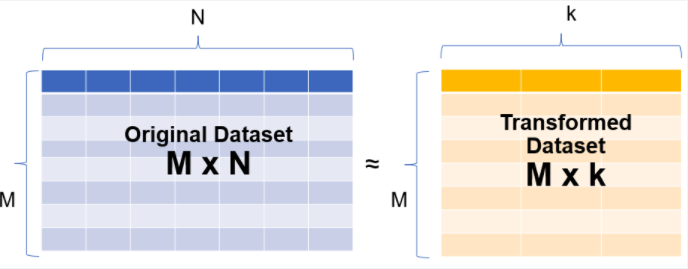

In [437]:
pca = PCA(random_state=100)

In [438]:
# Fitting PCA to our scaled traind data.
# This helps to identify new Principal components that help to explain 
# maximum variance and identify the required new non-standard basis vectors.
pca.fit(X_train_scaled)

PCA(random_state=100)

In [439]:
# This creates 134 Principal Components for our dataset.
# However, we do not need all of them, so we will try to identify 
# how many PCs are suitable to explain most of the dataset variance
pca.components_.shape

(134, 134)

In [440]:
# Principal axes in feature space, representing the directions of maximum variance in the data
pca.components_

array([[-9.73900643e-20, -1.66533454e-16, -0.00000000e+00, ...,
         1.22519039e-02,  1.02918604e-02, -7.56681568e-02],
       [ 3.25869459e-19,  1.66533454e-16, -2.22044605e-16, ...,
         4.00476612e-02,  3.89872044e-02,  7.57985260e-02],
       [-1.28833071e-19, -8.32667268e-17, -2.91433544e-16, ...,
         2.67685655e-01,  2.49524453e-01,  1.61192947e-02],
       ...,
       [-0.00000000e+00,  1.26234266e-01,  1.36164287e-01, ...,
         6.93889390e-18, -7.02563008e-17, -4.16333634e-17],
       [ 9.99999177e-01, -1.02798577e-03,  7.52934854e-04, ...,
        -2.03287907e-19,  6.77626358e-20, -6.39679282e-18],
       [-0.00000000e+00,  5.43394635e-01,  7.73537295e-01, ...,
        -3.46944695e-18, -6.24500451e-17, -1.11022302e-16]])

In [441]:
# Percentage of variance explained by each of the selected components.
# Explained variance ratio is always in descending order meaning that
# PC1 will explain maximum variance, followed by PC2 and son on.
# Last PC will explain the least variance
# explained_variance_ratio_ attribute helps us to identify such variance
pca.explained_variance_ratio_

array([1.23782105e-01, 7.80458127e-02, 5.06240834e-02, 4.39471595e-02,
       3.37175971e-02, 3.20124783e-02, 3.04933139e-02, 2.48723603e-02,
       2.32639171e-02, 2.22286144e-02, 2.12052966e-02, 2.09825529e-02,
       2.02670747e-02, 1.83125283e-02, 1.67167792e-02, 1.60213314e-02,
       1.56203547e-02, 1.47066113e-02, 1.40043265e-02, 1.37846786e-02,
       1.33835290e-02, 1.28522607e-02, 1.27386409e-02, 1.22446431e-02,
       1.20270529e-02, 1.15772286e-02, 1.00494917e-02, 9.66743764e-03,
       8.94061395e-03, 8.39835835e-03, 8.32346614e-03, 8.11175680e-03,
       7.90174465e-03, 7.81092820e-03, 7.47620542e-03, 7.40278325e-03,
       7.15220602e-03, 6.52598775e-03, 6.38477022e-03, 6.26092597e-03,
       6.05956562e-03, 5.95729385e-03, 5.81182365e-03, 5.73424165e-03,
       5.58764735e-03, 5.41375763e-03, 5.28042967e-03, 5.19628290e-03,
       4.89585855e-03, 4.70488771e-03, 4.51944527e-03, 4.41212457e-03,
       4.27593436e-03, 4.16402657e-03, 4.08225488e-03, 3.95631337e-03,
      

<BarContainer object of 134 artists>

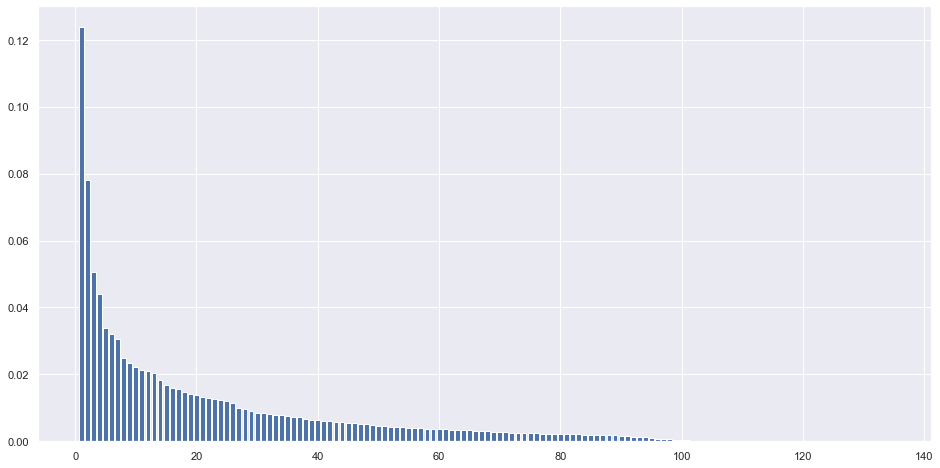

In [442]:
# Plotting the explained_variance_ratio_ in a bar graph to better understand 
plt.figure(figsize=(16,8))
plt.bar(range(1,len(pca.explained_variance_ratio_)+1), pca.explained_variance_ratio_)

<br><br><br>
## <font color='green'>Making Scree Plot</font>

In general, when you perform PCA, all the Principal Components are formed in decreasing order of the information that they explain. Therefore, the first principal component will always explain the highest variance, followed by the second principal component and so on. This order helps us in our dimensionality reduction exercise, as now we know which directions are more important than the others. 



<b>Scree Plot</b> is an elegant solution to simply add a plot of "Cumulative variance explained chart". Here against each number of components, we have the total variance explained by all the components till then.

In [443]:
var_cumu = np.cumsum(pca.explained_variance_ratio_)

<br>
<b> In below Scree Plot, we can observe that 85 PC(Principal Components) are able to explain almost 100 percent of the variance </b>

Text(0, 0.5, 'Cumulative variance explained')

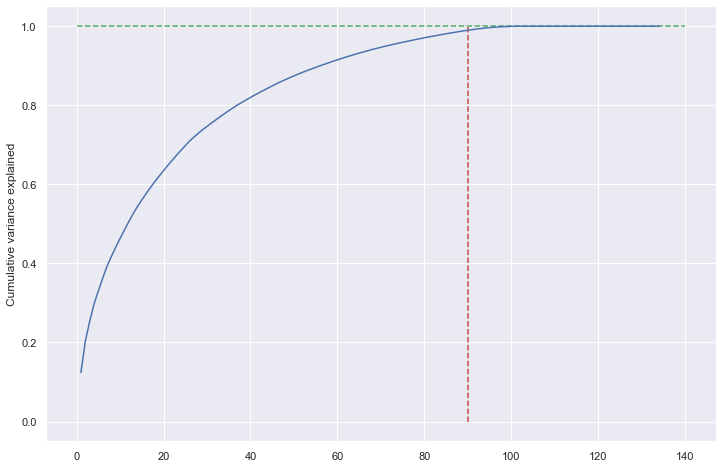

In [444]:
plt.figure(figsize=[12,8])
plt.plot(range(1,len(var_cumu)+1), var_cumu)
plt.hlines(y=1.0,xmax=140, xmin=0, colors="g", linestyles="--")
plt.vlines(x=90, ymax=1, ymin=0, colors="r", linestyles="--")
plt.ylabel("Cumulative variance explained")

<br>
<b> In below Scree Plot, we can observe that 65 PC(Principal Components) are able to explain almost 95 percent of the variance </b>

Text(0, 0.5, 'Cumulative variance explained')

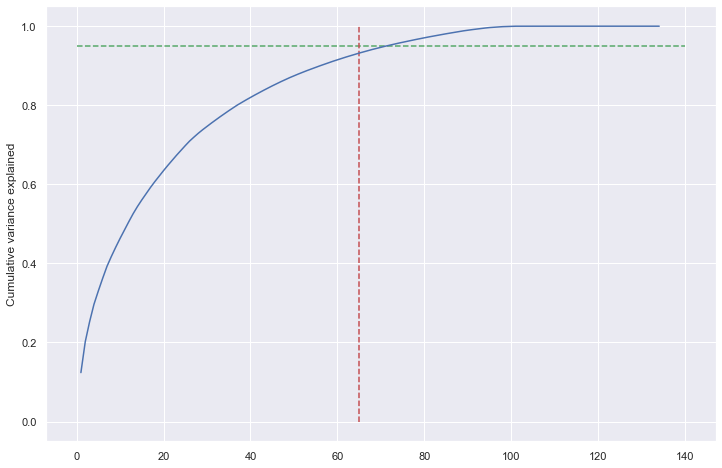

In [445]:
plt.figure(figsize=[12,8])
plt.plot(range(1,len(var_cumu)+1), var_cumu)
plt.hlines(y=0.95,xmax=140, xmin=0, colors="g", linestyles="--")
plt.vlines(x=65, ymax=1, ymin=0, colors="r", linestyles="--")
plt.ylabel("Cumulative variance explained")

<br>
<b> In below Scree Plot, we can observe that 50 PC(Principal Components) are able to explain almost 90 percent of the variance </b>

Text(0, 0.5, 'Cumulative variance explained')

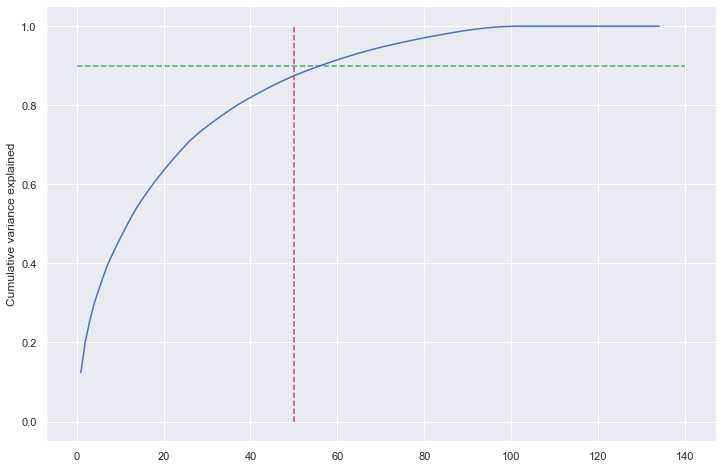

In [446]:
plt.figure(figsize=[12,8])
plt.plot(range(1,len(var_cumu)+1), var_cumu)
plt.hlines(y=0.90,xmax=140, xmin=0, colors="g", linestyles="--")
plt.vlines(x=50, ymax=1, ymin=0, colors="r", linestyles="--")
plt.ylabel("Cumulative variance explained")

## <font color='green'>Incremental PCA with 65 components that explain 95% of variance</font>

In [447]:
pca_final = IncrementalPCA(n_components=65)

### <font color='orange'>    Applying PCA transformation on Training Data </font>

In [448]:
X_train_scaled_pca = pca_final.fit_transform(X_train_scaled)

In [449]:
new_data = X_train_scaled_pca[:,[0,1]]

In [450]:
X_train_scaled_pca.shape

(38689, 65)

In [451]:
new_data.shape

(38689, 2)

In [452]:
t = train_df_copy[0:48999]
tt = t['churn_probability']

In [453]:
df = pd.DataFrame(data=new_data, columns=["PC1", "PC2"])
df.head()

,PC1,PC2
0,-1.196478,-2.524371
1,-2.193739,-2.005743
2,9.266455,12.969576
3,1.028424,5.382738
4,-2.049132,-0.967304


In [454]:
visualisation_pca_df = pd.concat([df, t], axis=1)

<b>Since PC1 and PC2 explain the most variance in the dataset, we should get some fair understanding of representation of the data when we visualise your dataset on these top 2 PCs/columns.</b>

<Figure size 1152x1152 with 0 Axes>

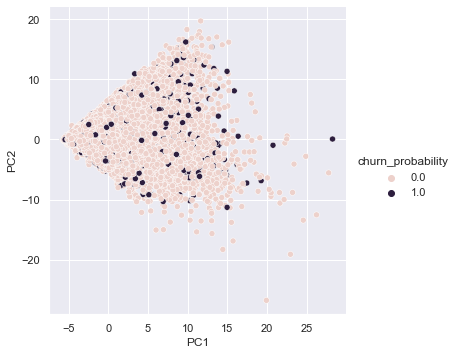

In [455]:
plt.figure(figsize=(16,16))
sns.pairplot(data=visualisation_pca_df, x_vars=["PC1"], y_vars=["PC2"], hue = "churn_probability", height=5)

In [456]:
corrmat = np.corrcoef(X_train_scaled_pca.transpose())
corrmat.shape

(65, 65)

<b> The below heatmap confirms the concept that all the PC(Principal components) are uncorelated with each other </b>

<AxesSubplot:>

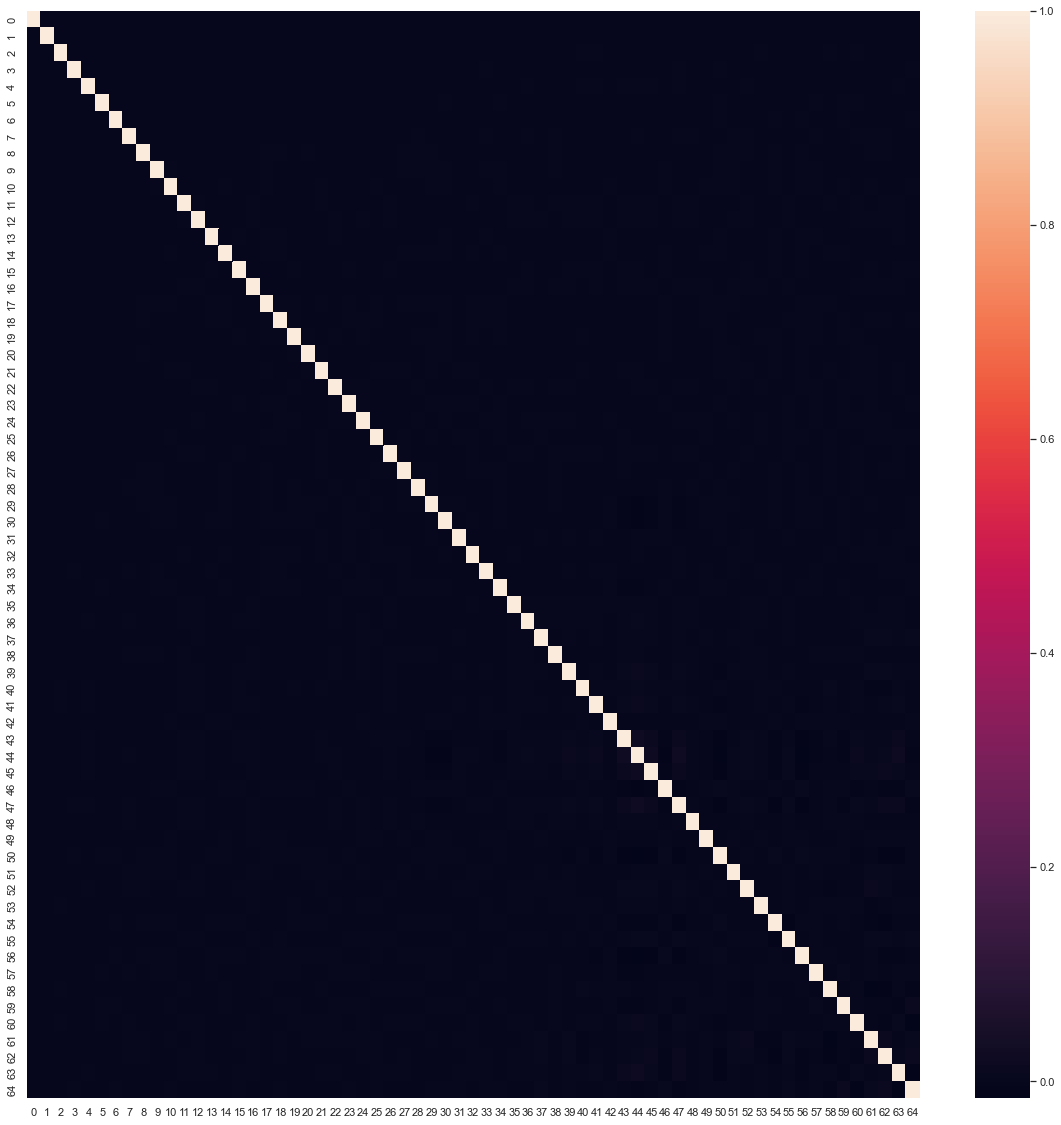

In [457]:
plt.figure(figsize=[20,20])
sns.heatmap(corrmat)

### <font color='orange'>    Applying PCA transformation on Validation Data </font>

In [458]:
X_validation_scaled_pca = pca_final.transform(X_validation_scaled)

# MODEL 1 - Logistic Regression

In [459]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

### Logistic regression on Training Data

In [460]:
logreg = LogisticRegression()

In [461]:
print(datetime.now())
logreg.fit(X_train_scaled_pca, y_train)
print(datetime.now())

2022-03-16 22:13:21.321249
2022-03-16 22:13:21.919319


In [462]:
y_train_pred = logreg.predict(X_train_scaled_pca)
y_train_pred[0:5]

array([0, 0, 0, 0, 0])

In [463]:
logistic_regression_train_accuracy = accuracy_score(y_true=y_train, y_pred=y_train_pred)
logistic_regression_train_accuracy

0.9169014448551268

In [464]:
confusion_matrix(y_true=y_train, y_pred=y_train_pred)

array([[34099,   606],
       [ 2609,  1375]])

In [465]:
tn, fp, fn, tp = confusion_matrix(y_true=y_train, y_pred=y_train_pred).ravel()
logistic_regression_train_sensitivity = tp / (tp+fn)
logistic_regression_train_specificity = tn / (tn+fp)
logistic_regression_train_precision = tp / (tp+fp)
logistic_regression_train_recall = tp / (tp+fn)

In [466]:
logistic_regression_train_f1_score = f1_score(y_true=y_train, y_pred=y_train_pred)
logistic_regression_train_f1_score

0.46102263202011734

In [467]:
logistic_regression_train_roc_score = roc_auc_score(y_true=y_train, y_score=y_train_pred)
logistic_regression_train_roc_score

0.6638345306018772

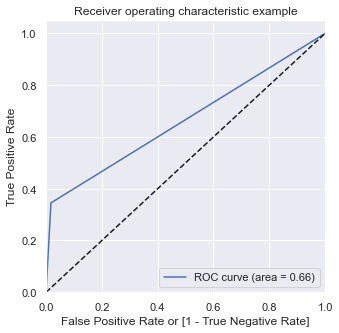

In [468]:
draw_roc(y_train, y_train_pred)

### Logistic regression on Validation Data

In [469]:
y_validation_pred = logreg.predict(X_validation_scaled_pca)
y_validation_pred[0:5]

array([0, 0, 0, 0, 0])

In [470]:
logistic_regression_validation_accuracy = accuracy_score(y_true=y_validation, y_pred=y_validation_pred)
logistic_regression_validation_accuracy

0.921657318617695

In [471]:
confusion_matrix(y_true=y_validation, y_pred=y_validation_pred)

array([[14680,   233],
       [ 1066,   602]])

In [472]:
tn, fp, fn, tp = confusion_matrix(y_true=y_validation, y_pred=y_validation_pred).ravel()
logistic_regression_validation_sensitivity = tp / (tp+fn)
logistic_regression_validation_specificity = tn / (tn+fp)
logistic_regression_validation_precision = tp / (tp+fp)
logistic_regression_validation_recall = tp / (tp+fn)

In [473]:
logistic_regression_validation_f1_score = f1_score(y_true=y_validation, y_pred=y_validation_pred)
logistic_regression_validation_f1_score 

0.4810227726727926

In [474]:
logistic_regression_validation_roc_score = roc_auc_score(y_true=y_validation, y_score=y_validation_pred)
logistic_regression_validation_roc_score

0.6726436593633964

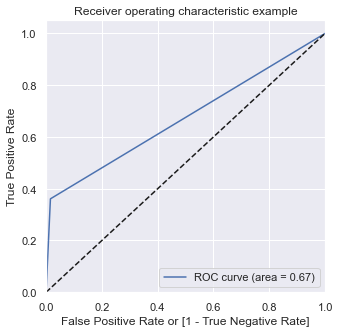

In [475]:
draw_roc(y_validation, y_validation_pred)

In [476]:
y_train_pred_proba = logreg.predict_proba(X_train_scaled_pca)
y_train_pred_proba = y_train_pred_proba[:,1]
y_train_pred_proba

array([0.00062586, 0.00610133, 0.00170281, ..., 0.00035857, 0.07400877,
       0.028566  ])

# MODEL 2 - Gradient Boosting

### Gradient Boosting on Training Data

In [477]:
#?GradientBoostingClassifier

In [478]:
gbc = GradientBoostingClassifier(random_state=100)

In [479]:
gbc_params = {
    'learning_rate':[0.10,0.05,0.02],
}

In [480]:
grid = GridSearchCV(
    estimator=gbc,
    param_grid=gbc_params,
    scoring="accuracy",
    cv=2,
    n_jobs=-1,
    verbose=10
)

In [481]:
#grid.fit(X_train_scaled_pca, y_train)

In [482]:
#grid.best_estimator_

In [483]:
#grid.best_score_

In [484]:
#gbc.fit(X_train_scaled_pca, y_train)

In [485]:
#?gbc

In [486]:
#gbc_train_pred = gbc.predict(X_train_scaled_pca)
#gbc_train_pred[:5]

In [487]:
#gbc_test_pred = gbc.predict(X_validation_scaled_pca)
#gbc_test_pred[:5]

In [488]:
gbc_hyper = GradientBoostingClassifier(max_depth=5, n_estimators=500, random_state=100)

In [489]:
print(datetime.now())
gbc_hyper.fit(X_train_scaled_pca, y_train)
print(datetime.now())

2022-03-16 22:13:23.106719
2022-03-16 22:27:53.582916


In [490]:
gbc_hyper_train_pred = gbc_hyper.predict(X_train_scaled_pca)
gbc_hyper_train_pred[:5]

array([0, 0, 0, 0, 0])

In [491]:
gradientboost_train_accuracy = accuracy_score(y_true=y_train, y_pred=gbc_hyper_train_pred)
gradientboost_train_accuracy

0.9841298560314301

In [492]:
confusion_matrix(y_true=y_train, y_pred=gbc_hyper_train_pred)

array([[34657,    48],
       [  566,  3418]])

In [493]:
tn, fp, fn, tp = confusion_matrix(y_true=y_train, y_pred=gbc_hyper_train_pred).ravel()
gradientboost_train_sensitivity = tp / (tp+fn)
gradientboost_train_specificity = tn / (tn+fp)
gradientboost_train_precision = tp / (tp+fp)
gradientboost_train_recall = tp / (tp+fn)

In [494]:
gradientboost_train_f1_score = f1_score(y_true=y_train, y_pred=gbc_hyper_train_pred)
gradientboost_train_f1_score

0.9175838926174497

In [495]:
gradientboost_train_roc_score = roc_auc_score(y_true=y_train, y_score=gbc_hyper_train_pred)
gradientboost_train_roc_score

0.9282743204484847

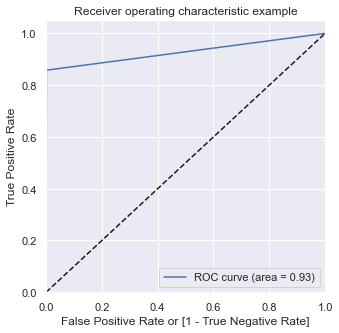

In [496]:
draw_roc(y_train, gbc_hyper_train_pred)

### Gradient Boosting on Validation Data

In [497]:
gbc_hyper_test_pred = gbc_hyper.predict(X_validation_scaled_pca)
gbc_hyper_test_pred[:5]

array([0, 1, 0, 0, 0])

In [498]:
#gradientboost_validation_accuracy = accuracy_score(y_true=y_validation, y_pred=gbc_test_pred)
gradientboost_validation_accuracy = accuracy_score(y_true=y_validation, y_pred=gbc_hyper_test_pred)
gradientboost_validation_accuracy

0.9263011881068693

In [499]:
confusion_matrix(y_true=y_validation, y_pred=gbc_hyper_test_pred)

array([[14509,   404],
       [  818,   850]])

In [500]:
tn, fp, fn, tp = confusion_matrix(y_true=y_validation, y_pred=gbc_hyper_test_pred).ravel()
gradientboost_validation_sensitivity = tp / (tp+fn)
gradientboost_validation_specificity = tn / (tn+fp)
gradientboost_validation_precision = tp / (tp+fp)
gradientboost_validation_recall = tp / (tp+fn)

In [501]:
gradientboost_validation_f1_score = f1_score(y_true=y_validation, y_pred=gbc_hyper_test_pred)
gradientboost_validation_f1_score

0.5817932922655715

In [502]:
gradientboost_validation_roc_score = roc_auc_score(y_true=y_validation, y_score=gbc_hyper_test_pred)
gradientboost_validation_roc_score

0.7412509340747077

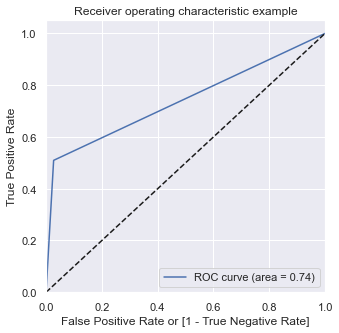

In [503]:
draw_roc(y_validation, gbc_hyper_test_pred)

# MODEL 3 - Normal Random Forest Classifier


### RandomForestClassifier on Training Data

In [504]:
rfc = RandomForestClassifier(random_state=100)

In [505]:
print(datetime.now())
rfc.fit(X_train_scaled_pca, y_train)
print(datetime.now())

2022-03-16 22:27:55.488504
2022-03-16 22:28:29.487112


In [506]:
rfc_train_pred = rfc.predict(X_train_scaled_pca)
rfc_train_pred[:5]

array([0, 0, 0, 0, 0])

In [507]:
randomforest_train_accuracy = accuracy_score(y_true=y_train, y_pred=rfc_train_pred)
randomforest_train_accuracy

0.999974152859986

In [508]:
confusion_matrix(y_true=y_train, y_pred=rfc_train_pred)

array([[34705,     0],
       [    1,  3983]])

In [509]:
tn, fp, fn, tp = confusion_matrix(y_true=y_train, y_pred=rfc_train_pred).ravel()
randomforest_train_sensitivity = tp / (tp+fn)
randomforest_train_specificity = tn / (tn+fp)
randomforest_train_precision = tp / (tp+fp)
randomforest_train_recall = tp / (tp+fn)

In [510]:
randomforest_train_f1_score = f1_score(y_true=y_train, y_pred=rfc_train_pred)
randomforest_train_f1_score 

0.9998744822392369

In [511]:
randomforest_train_roc_score = roc_auc_score(y_true=y_train, y_score=rfc_train_pred)
randomforest_train_roc_score

0.9998744979919678

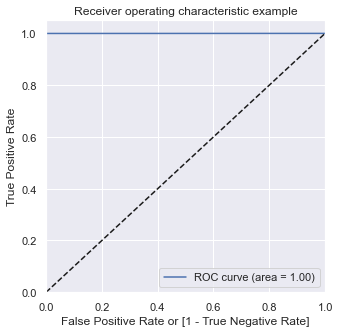

In [512]:
draw_roc(y_train, rfc_train_pred)

### RandomForestClassifier on Test Data


In [513]:
rfc_test_pred = rfc.predict(X_validation_scaled_pca)
rfc_test_pred[:5]

array([0, 1, 0, 0, 0])

In [514]:
randomforest_validation_accuracy = accuracy_score(y_true=y_validation, y_pred=rfc_test_pred)
randomforest_validation_accuracy

0.9192449188830589

In [515]:
confusion_matrix(y_true=y_validation, y_pred=rfc_test_pred)

array([[14745,   168],
       [ 1171,   497]])

In [516]:
tn, fp, fn, tp = confusion_matrix(y_true=y_validation, y_pred=rfc_test_pred).ravel()
randomforest_validation_sensitivity = tp / (tp+fn)
randomforest_validation_specificity = tn / (tn+fp)
randomforest_validation_precision = tp / (tp+fp)
randomforest_validation_recall = tp / (tp+fn)

In [517]:
randomforest_validation_f1_score = f1_score(y_true=y_validation, y_pred=rfc_test_pred)
randomforest_validation_f1_score 

0.4260608658379768

In [518]:
randomforest_validation_roc_score = roc_auc_score(y_true=y_validation, y_score=rfc_test_pred)
randomforest_validation_roc_score

0.6433481458647204

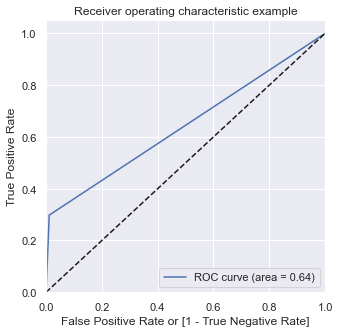

In [519]:
draw_roc(y_validation, rfc_test_pred)

# MODEL 4 - Adaboost Classifier


### AdaBoostClassifier on Training Data

In [520]:
ada = AdaBoostClassifier(random_state=100)

In [521]:
print(datetime.now())
ada.fit(X_train_scaled_pca, y_train)
print(datetime.now())

2022-03-16 22:28:31.466431
2022-03-16 22:28:51.507154


In [522]:
ada_train_pred = ada.predict(X_train_scaled_pca)
ada_train_pred[:5]

array([0, 0, 0, 0, 0])

In [523]:
adaboost_train_accuracy = accuracy_score(y_true=y_train, y_pred=ada_train_pred)
adaboost_train_accuracy

0.9132311509731448

In [524]:
confusion_matrix(y_true=y_train, y_pred=ada_train_pred)

array([[33746,   959],
       [ 2398,  1586]])

In [525]:
tn, fp, fn, tp = confusion_matrix(y_true=y_train, y_pred=ada_train_pred).ravel()
adaboost_train_sensitivity = tp / (tp+fn)
adaboost_train_specificity = tn / (tn+fp)
adaboost_train_precision = tp / (tp+fp)
adaboost_train_recall = tp / (tp+fn)

In [526]:
adaboost_train_f1_score = f1_score(y_true=y_train, y_pred=ada_train_pred)
adaboost_train_f1_score 

0.4858324398835962

In [527]:
adaboost_train_roc_score = roc_auc_score(y_true=y_train, y_score=ada_train_pred)
adaboost_train_roc_score

0.6852297317782874

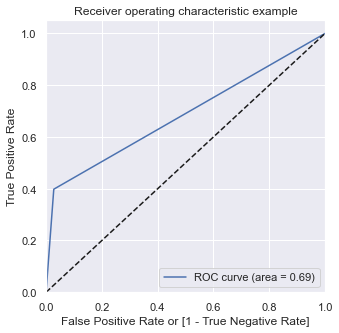

In [528]:
draw_roc(y_train, ada_train_pred)

### AdaBoostClassifier on Test Data

In [529]:
ada_test_pred = ada.predict(X_validation_scaled_pca)
ada_test_pred[:5]

array([0, 0, 0, 0, 0])

In [530]:
adaboost_validation_accuracy = accuracy_score(y_true=y_validation, y_pred=ada_test_pred)
adaboost_validation_accuracy

0.9141788794403233

In [531]:
confusion_matrix(y_true=y_validation, y_pred=ada_test_pred)

array([[14523,   390],
       [ 1033,   635]])

In [532]:
tn, fp, fn, tp = confusion_matrix(y_true=y_validation, y_pred=ada_test_pred).ravel()
adaboost_validation_sensitivity = tp / (tp+fn)
adaboost_validation_specificity = tn / (tn+fp)
adaboost_validation_precision = tp / (tp+fp)
adaboost_validation_recall = tp / (tp+fn)

In [533]:
adaboost_validation_f1_score = f1_score(y_true=y_validation, y_pred=ada_test_pred)
adaboost_validation_f1_score 

0.4715930189379874

In [534]:
adaboost_validation_roc_score = roc_auc_score(y_true=y_validation, y_score=ada_test_pred)
adaboost_validation_roc_score

0.6772718819512887

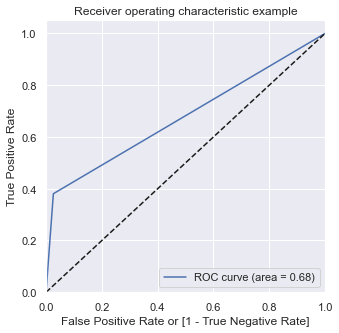

In [535]:
draw_roc(y_validation, ada_test_pred)

# MODEL 5- Balanced Random Forest Classifier 

### BalancedRandomForestClassifier on Training Data

In [536]:
brfc = BalancedRandomForestClassifier(random_state=100)

In [537]:
print(datetime.now())
brfc.fit(X_train_scaled_pca, y_train)
print(datetime.now())

2022-03-16 22:28:53.197223
2022-03-16 22:29:00.337163


In [538]:
brfc_train_pred = brfc.predict(X_train_scaled_pca)
brfc_train_pred[:5]

array([0, 0, 0, 0, 0])

In [539]:
balanced_randomforest_train_accuracy = accuracy_score(y_true=y_train, y_pred=brfc_train_pred)
balanced_randomforest_train_accuracy

0.8895551707203598

In [540]:
tn, fp, fn, tp = confusion_matrix(y_true=y_train, y_pred=brfc_train_pred).ravel()
balanced_randomforest_train_sensitivity = tp / (tp+fn)
balanced_randomforest_train_specificity = tn / (tn+fp)
balanced_randomforest_train_precision = tp / (tp+fp)
balanced_randomforest_train_recall = tp / (tp+fn)

In [541]:
confusion_matrix(y_true=y_train, y_pred=brfc_train_pred)

array([[30432,  4273],
       [    0,  3984]])

In [542]:
balanced_randomforest_train_f1_score = f1_score(y_true=y_train, y_pred=brfc_train_pred)
balanced_randomforest_train_f1_score 

0.650927211829099

In [543]:
balanced_randomforest_train_roc_score = roc_auc_score(y_true=y_train, y_score=brfc_train_pred)
balanced_randomforest_train_roc_score

0.9384382653796283

### BalancedRandomForestClassifier on Test Data

In [544]:
brfc_validation_pred = brfc.predict(X_validation_scaled_pca)
brfc_validation_pred[:5]

array([0, 1, 0, 0, 0])

In [545]:
balanced_randomforest_validation_accuracy = accuracy_score(y_true=y_validation, y_pred=brfc_validation_pred)
balanced_randomforest_validation_accuracy

0.8532054761473976

In [546]:
tn, fp, fn, tp = confusion_matrix(y_true=y_validation, y_pred=brfc_validation_pred).ravel()
balanced_randomforest_validation_sensitivity = tp / (tp+fn)
balanced_randomforest_validation_specificity = tn / (tn+fp)
balanced_randomforest_validation_precision = tp / (tp+fp)
balanced_randomforest_validation_recall = tp / (tp+fn)

In [547]:
confusion_matrix(y_true=y_validation, y_pred=brfc_validation_pred)

array([[12769,  2144],
       [  290,  1378]])

In [548]:
balanced_randomforest_validation_f1_score = f1_score(y_true=y_validation, y_pred=brfc_validation_pred)
balanced_randomforest_validation_f1_score 

0.5310211946050097

In [549]:
balanced_randomforest_validation_roc_score = roc_auc_score(y_true=y_validation, y_score=brfc_validation_pred)
balanced_randomforest_validation_roc_score

0.8411859528671571

In [550]:
y.value_counts()

0    49618
1     5652
Name: churn_probability, dtype: int64

# MODEL 6 - Random Forest Classifier with SMOTE

In [551]:
X.shape

(55270, 134)

In [552]:
y.shape

(55270,)

In [553]:
oversample = SMOTE()
over_X, over_y1 = oversample.fit_resample(X, y)

In [554]:
over_X.shape, over_y1.shape

((99236, 134), (99236,))

In [555]:
over_y1.head(round(0.9 * over_X.shape[0])).value_counts()

0    49618
1    39694
Name: churn_probability, dtype: int64

In [556]:
over_X['churn_probability'] = over_y1

In [557]:
over_X = over_X.sample(frac=1)

In [558]:
over_y = over_X.pop('churn_probability')

In [559]:
over_X.shape, over_y.shape

((99236, 134), (99236,))

In [560]:
over_y.head(round(0.9 * over_X.shape[0])).value_counts()

1    44681
0    44631
Name: churn_probability, dtype: int64

In [561]:
over_X_train, over_X_validation, over_y_train, over_y_validation = train_test_split(over_X, over_y, train_size=0.9, random_state=100)
over_X_train.shape, over_y_train.shape, over_X_validation.shape, over_y_validation.shape

((89312, 134), (89312,), (9924, 134), (9924,))

In [562]:
over_scaler = StandardScaler()
over_X_train_scaled = pd.DataFrame(scaler.fit_transform(over_X_train))
over_X_validation_scaled = pd.DataFrame(scaler.transform(over_X_validation))

In [563]:
over_pca_final = IncrementalPCA(n_components=65)

In [564]:
over_X_train_scaled_pca = over_pca_final.fit_transform(over_X_train_scaled)

In [565]:
over_X_validation_scaled_pca = over_pca_final.transform(over_X_validation_scaled)

### Random Forest Classifier with SMOTE - Training Data

In [566]:
smote_rfc = RandomForestClassifier(n_estimators=500, random_state=100)

In [567]:
print(datetime.now())
smote_rfc.fit(over_X_train_scaled_pca, over_y_train)
print(datetime.now())

2022-03-16 22:29:08.367600
2022-03-16 22:37:23.835244


In [568]:
smote_rfc_train_pred = smote_rfc.predict(over_X_train_scaled_pca)
smote_rfc_train_pred[:5]

array([0, 0, 1, 1, 1])

In [569]:
smote_rfc_train_accuracy = accuracy_score(y_true=over_y_train, y_pred=smote_rfc_train_pred)
smote_rfc_train_accuracy

1.0

In [570]:
confusion_matrix(y_true=over_y_train, y_pred=smote_rfc_train_pred)

array([[44657,     0],
       [    0, 44655]])

In [571]:
tn, fp, fn, tp = confusion_matrix(y_true=over_y_train, y_pred=smote_rfc_train_pred).ravel()
smote_randomforest_train_sensitivity = tp / (tp+fn)
smote_randomforest_train_specificity = tn / (tn+fp)
smote_randomforest_train_precision = tp / (tp+fp)
smote_randomforest_train_recall = tp / (tp+fn)

In [572]:
smote_randomforest_train_f1_score = f1_score(y_true=over_y_train, y_pred=smote_rfc_train_pred)
smote_randomforest_train_f1_score 

1.0

In [573]:
smote_randomforest_train_roc_score = roc_auc_score(y_true=over_y_train, y_score=smote_rfc_train_pred)
smote_randomforest_train_roc_score

1.0

### Random Forest Classifier with SMOTE - Test Data


In [574]:
smote_rfc_validation_pred = smote_rfc.predict(over_X_validation_scaled_pca)
smote_rfc_validation_pred[:5]

array([0, 0, 0, 1, 0])

In [575]:
smote_rfc_validation_accuracy = accuracy_score(y_true=over_y_validation, y_pred=smote_rfc_validation_pred)
smote_rfc_validation_accuracy

0.9443772672309553

In [576]:
confusion_matrix(y_true=over_y_validation, y_pred=smote_rfc_validation_pred)

array([[4639,  322],
       [ 230, 4733]])

In [577]:
tn, fp, fn, tp = confusion_matrix(y_true=over_y_validation, y_pred=smote_rfc_validation_pred).ravel()
smote_randomforest_validation_sensitivity = tp / (tp+fn)
smote_randomforest_validation_specificity = tn / (tn+fp)
smote_randomforest_validation_precision = tp / (tp+fp)
smote_randomforest_validation_recall = tp / (tp+fn)

In [578]:
smote_randomforest_validation_f1_score = f1_score(y_true=over_y_validation, y_pred=smote_rfc_validation_pred)
smote_randomforest_validation_f1_score 

0.944899181473348

In [579]:
smote_randomforest_validation_roc_score = roc_auc_score(y_true=over_y_validation, y_score=smote_rfc_validation_pred)
smote_randomforest_validation_roc_score

0.9443753966816649

# MODEL COMPARISONS

<b>Creating a dataframe with model evaluation metrics for all different Models for quick comparison & analysis</b>

In [580]:
model_comparison_df = pd.DataFrame(data={'Model_name':['Logistic Regression','Gradient Boost', 'Basic Random Forest', 'Ada Boost', 'Balanced Random Forest', 'SMOTE Random Forest'],
            'Training accuracy':[logistic_regression_train_accuracy, gradientboost_train_accuracy, randomforest_train_accuracy,adaboost_train_accuracy,balanced_randomforest_train_accuracy, smote_rfc_train_accuracy],
            'Validation accuracy':[logistic_regression_validation_accuracy, gradientboost_validation_accuracy, randomforest_validation_accuracy,adaboost_validation_accuracy,balanced_randomforest_validation_accuracy,smote_rfc_validation_accuracy],
            'Training Sensitivity':[logistic_regression_train_sensitivity, gradientboost_train_sensitivity, randomforest_train_sensitivity, adaboost_train_sensitivity,balanced_randomforest_train_sensitivity,smote_randomforest_train_sensitivity],
            'Validation Sensitivity':[logistic_regression_validation_sensitivity, gradientboost_validation_sensitivity, randomforest_validation_sensitivity,adaboost_validation_sensitivity,balanced_randomforest_validation_sensitivity,smote_randomforest_validation_sensitivity],
            'Training Specificity':[logistic_regression_train_specificity, gradientboost_train_specificity, randomforest_train_specificity,adaboost_train_specificity,balanced_randomforest_train_specificity,smote_randomforest_train_specificity],
            'Validation Specificity':[logistic_regression_validation_specificity, gradientboost_validation_specificity, randomforest_validation_specificity,adaboost_validation_specificity,balanced_randomforest_validation_specificity,smote_randomforest_validation_specificity],
            'Training Precision':[logistic_regression_train_precision, gradientboost_train_precision, randomforest_train_precision,adaboost_train_precision,balanced_randomforest_train_precision,smote_randomforest_train_precision],
            'Validation Precision':[logistic_regression_validation_precision, gradientboost_validation_precision, randomforest_validation_precision,adaboost_validation_precision,balanced_randomforest_validation_precision,smote_randomforest_validation_precision],
            'Training Recall':[logistic_regression_train_recall, gradientboost_train_recall, randomforest_train_recall,adaboost_train_recall,balanced_randomforest_train_recall,smote_randomforest_train_recall],
            'Validation Recall':[logistic_regression_validation_recall, gradientboost_validation_recall, randomforest_validation_recall,adaboost_validation_recall,balanced_randomforest_validation_recall,smote_randomforest_validation_recall],
            'Training ROC score':[logistic_regression_train_roc_score, gradientboost_train_roc_score, randomforest_train_roc_score, adaboost_train_roc_score,balanced_randomforest_train_roc_score,smote_randomforest_train_roc_score],
            'Validation ROC score':[logistic_regression_validation_roc_score, gradientboost_validation_roc_score, randomforest_validation_roc_score, adaboost_validation_roc_score,balanced_randomforest_validation_roc_score,smote_randomforest_validation_roc_score],
            'Training F1 score':[logistic_regression_train_f1_score, gradientboost_train_f1_score, randomforest_train_f1_score, adaboost_train_f1_score,balanced_randomforest_train_f1_score,smote_randomforest_train_f1_score],
            'Validation F1 score':[logistic_regression_validation_f1_score, gradientboost_validation_f1_score, randomforest_validation_f1_score, adaboost_validation_f1_score,balanced_randomforest_validation_f1_score,smote_randomforest_validation_f1_score]
            })

In [581]:
model_comparison_df 

,Model_name,Training accuracy,Validation accuracy,Training Sensitivity,Validation Sensitivity,Training Specificity,Validation Specificity,Training Precision,Validation Precision,Training Recall,Validation Recall,Training ROC score,Validation ROC score,Training F1 score,Validation F1 score
0,Logistic Regression,0.916901,0.921657,0.345131,0.360911,0.982539,0.984376,0.694094,0.720958,0.345131,0.360911,0.663835,0.672644,0.461023,0.481023
1,Gradient Boost,0.984130,0.926301,0.857932,0.509592,0.998617,0.972910,0.986151,0.677831,0.857932,0.509592,0.928274,0.741251,0.917584,0.581793
2,Basic Random Forest,0.999974,0.919245,0.999749,0.297962,1.000000,0.988735,1.000000,0.747368,0.999749,0.297962,0.999874,0.643348,0.999874,0.426061
3,Ada Boost,0.913231,0.914179,0.398092,0.380695,0.972367,0.973848,0.623183,0.619512,0.398092,0.380695,0.685230,0.677272,0.485832,0.471593
4,Balanced Random Forest,0.889555,0.853205,1.000000,0.826139,0.876877,0.856233,0.482500,0.391255,1.000000,0.826139,0.938438,0.841186,0.650927,0.531021
5,SMOTE Random Forest,1.000000,0.944377,1.000000,0.953657,1.000000,0.935094,1.000000,0.936301,1.000000,0.953657,1.000000,0.944375,1.000000,0.944899


### <u>Model Comparision & summary</u>
<b>
We can see that below 2 models are proving best accuracy :
<ul>
    <li>Random Forest with SMOTE </li>
    <li>Gradient Boosting</li>
</ul>
<br>
But, if we take a look at other model evaluation metrics, SMOTE with Random Forest is a allround model with good scores for all metrics. Thus we can assume that this should perform resonably well with Test dataset as well.
<br>
    
Hence, considering the allround performance of model for all evaludation metrics like Accuracy, Precision, Recall, Sensitivity, Specificity, we decide to go with SMOTE with Random Forest as our primary model. </b>


In [582]:
train_df.shape

(55270, 134)

In [583]:
train_df_copy.shape

(69999, 172)

# Trying hands-on on Test set now.....

<br>
# Reading test dataset

In [584]:
test_df = pd.read_csv('test.csv')
test_df.shape

(30000, 171)

In [585]:
test_df_copy = test_df.copy(deep=True)
test_df_copy.shape

(30000, 171)

In [586]:
test_df.head(3)

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g
0,69999,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,91.882,65.330,64.445,31.78,20.23,23.11,60.16,32.16,34.83,0.00,0.00,0.00,0.00,0.00,0.00,24.88,20.23,21.06,18.13,10.89,8.36,0.00,13.58,0.0,0.0,0.0,0.03,43.01,44.71,29.43,6.9,0.0,2.05,42.03,7.68,26.43,0.0,0.0,0.0,0.0,0.0,0.0,48.93,7.68,28.48,0.0,0.0,0.0,0.0,0.0,0.03,0.0,0.0,0.0,91.94,52.39,57.94,30.33,37.56,21.98,10.21,4.59,9.53,0.26,0.0,0.0,40.81,42.16,31.51,0.0,0.0,0.0,0.36,1.04,4.34,0.0,0.0,0.0,0.0,0.0,0.0,0.36,1.04,4.34,41.73,43.56,36.26,0.54,0.34,0.39,0.00,0.00,0.00,0.0,0.0,0.0,5,5,4,103,90,60,50,30,30,6/21/2014,7/26/2014,8/24/2014,30,30,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,1692,0.00,0.00,0.00
1,70000,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,414.168,515.568,360.868,75.51,41.21,19.84,474.34,621.84,394.94,0.00,0.00,0.00,0.00,0.00,0.00,75.51,41.21,19.84,473.61,598.08,377.26,0.73,0.00,0.0,0.0,0.0,0.00,549.86,639.29,397.11,0.0,0.0,0.00,0.00,23.76,17.68,0.0,0.0,0.0,0.0,0.0,0.0,0.00,23.76,17.68,0.0,0.0,0.8,0.0,0.0,0.00,0.0,0.0,0.0,549.86,663.06,415.59,19.99,26.95,2.61,160.19,122.29,184.81,1.49,0.0,0.0,181.69,149.24,187.43,0.0,0.0,0.0,0.00,12.51,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,12.51,0.00,296.33,339.64,281.66,0.00,0.00,0.00,114.63,177.88,94.23,0.0,0.0,0.0,5,4,5,500,500,500,250,250,250,6/19/2014,7/16/2014,8/24/2014,250,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

<br><br>
## Doing all required transformation on test data now....

In [587]:
test_categorical_df = test_df.select_dtypes(include=['object'])
test_numerical_df = test_df.select_dtypes(include=['int64','int32','float32','float64'])

In [588]:
test_categorical_df.shape, test_numerical_df.shape

((30000, 9), (30000, 162))

<br><br>
## <font color='green'> Data Preparation-Step1 || Retaining columns where not-NAN values are minimum 80%</font>

In [589]:
cols_to_drop=['arpu_3g_6','count_rech_2g_6','night_pck_user_6','arpu_2g_6','date_of_last_rech_data_6','total_rech_data_6','av_rech_amt_data_6','max_rech_data_6','count_rech_3g_6','fb_user_6','night_pck_user_7','date_of_last_rech_data_7','total_rech_data_7','max_rech_data_7','fb_user_7','count_rech_2g_7','count_rech_3g_7','arpu_3g_7','av_rech_amt_data_7','arpu_2g_7','count_rech_2g_8','av_rech_amt_data_8','night_pck_user_8','max_rech_data_8','total_rech_data_8','arpu_2g_8','arpu_3g_8','date_of_last_rech_data_8','fb_user_8','count_rech_3g_8']
test_df.drop(columns=cols_to_drop, inplace=True)

In [590]:
test_df.shape

(30000, 141)

<br>
## <font color='green'> Data Preparation-Step2 || Find Missing values again after Step 2 & Imputing them </font>

In [591]:
test_df['spl_ic_mou_6'].fillna(value=0,inplace=True)
test_df['std_og_t2c_mou_6'].fillna(value=0,inplace=True)
test_df['std_og_mou_6'].fillna(value=0,inplace=True)
test_df['isd_ic_mou_6'].fillna(value=0,inplace=True)
test_df['isd_og_mou_6'].fillna(value=0,inplace=True)
test_df['std_ic_t2m_mou_6'].fillna(value=0,inplace=True)

test_df['spl_og_mou_6'].fillna(value=0,inplace=True)
test_df['std_ic_t2t_mou_6'].fillna(value=0,inplace=True)
test_df['loc_ic_t2t_mou_6'].fillna(value=0,inplace=True)
test_df['isd_ic_mou_6'].fillna(value=0,inplace=True)
test_df['std_ic_t2o_mou_6'].fillna(value=0,inplace=True)
test_df['loc_ic_t2m_mou_6'].fillna(value=0,inplace=True)

test_df['std_ic_t2f_mou_6'].fillna(value=0,inplace=True)
test_df['loc_ic_mou_6'].fillna(value=0,inplace=True)
test_df['loc_ic_t2t_mou_6'].fillna(value=0,inplace=True)
test_df['offnet_mou_6'].fillna(value=0,inplace=True)
test_df['onnet_mou_6'].fillna(value=0,inplace=True)
test_df['loc_og_t2m_mou_6'].fillna(value=0,inplace=True)

test_df['roam_og_mou_6'].fillna(value=0,inplace=True)
test_df['loc_og_t2f_mou_6'].fillna(value=0,inplace=True)
test_df['roam_ic_mou_6'].fillna(value=0,inplace=True)
test_df['std_og_t2f_mou_6'].fillna(value=0,inplace=True)
test_df['loc_og_t2c_mou_6'].fillna(value=0,inplace=True)
test_df['loc_og_mou_6'].fillna(value=0,inplace=True)

test_df['loc_og_t2t_mou_6'].fillna(value=0,inplace=True)
test_df['std_og_t2t_mou_6'].fillna(value=0,inplace=True)
test_df['std_og_t2m_mou_6'].fillna(value=0,inplace=True)
test_df['total_og_mou_6'].fillna(value=0,inplace=True)
test_df['total_ic_mou_6'].fillna(value=0,inplace=True)

test_df['loc_ic_t2f_mou_6'].fillna(value=0,inplace=True)
test_df['std_ic_mou_6'].fillna(value=0,inplace=True)

In [592]:
test_df['spl_ic_mou_7'].fillna(value=0,inplace=True)
test_df['std_og_t2c_mou_7'].fillna(value=0,inplace=True)
test_df['std_og_mou_7'].fillna(value=0,inplace=True)
test_df['isd_ic_mou_7'].fillna(value=0,inplace=True)
test_df['isd_og_mou_7'].fillna(value=0,inplace=True)
test_df['std_ic_t2m_mou_7'].fillna(value=0,inplace=True)

test_df['spl_og_mou_7'].fillna(value=0,inplace=True)
test_df['std_ic_t2t_mou_7'].fillna(value=0,inplace=True)
test_df['loc_ic_t2t_mou_7'].fillna(value=0,inplace=True)
test_df['isd_ic_mou_7'].fillna(value=0,inplace=True)
test_df['std_ic_t2o_mou_7'].fillna(value=0,inplace=True)
test_df['loc_ic_t2m_mou_7'].fillna(value=0,inplace=True)

test_df['std_ic_t2f_mou_7'].fillna(value=0,inplace=True)
test_df['loc_ic_mou_7'].fillna(value=0,inplace=True)
test_df['loc_ic_t2t_mou_7'].fillna(value=0,inplace=True)
test_df['offnet_mou_7'].fillna(value=0,inplace=True)
test_df['onnet_mou_7'].fillna(value=0,inplace=True)
test_df['loc_og_t2m_mou_7'].fillna(value=0,inplace=True)

test_df['roam_og_mou_7'].fillna(value=0,inplace=True)
test_df['loc_og_t2f_mou_7'].fillna(value=0,inplace=True)
test_df['roam_ic_mou_7'].fillna(value=0,inplace=True)
test_df['std_og_t2f_mou_7'].fillna(value=0,inplace=True)
test_df['loc_og_t2c_mou_7'].fillna(value=0,inplace=True)
test_df['loc_og_mou_7'].fillna(value=0,inplace=True)

test_df['loc_og_t2t_mou_7'].fillna(value=0,inplace=True)
test_df['std_og_t2t_mou_7'].fillna(value=0,inplace=True)
test_df['std_og_t2m_mou_7'].fillna(value=0,inplace=True)
test_df['total_og_mou_7'].fillna(value=0,inplace=True)
test_df['total_ic_mou_7'].fillna(value=0,inplace=True)

test_df['loc_ic_t2f_mou_7'].fillna(value=0,inplace=True)
test_df['std_ic_mou_7'].fillna(value=0,inplace=True)

In [593]:
test_df['spl_ic_mou_8'].fillna(value=0,inplace=True)
test_df['std_og_t2c_mou_8'].fillna(value=0,inplace=True)
test_df['std_og_mou_8'].fillna(value=0,inplace=True)
test_df['isd_ic_mou_8'].fillna(value=0,inplace=True)
test_df['isd_og_mou_8'].fillna(value=0,inplace=True)
test_df['std_ic_t2m_mou_8'].fillna(value=0,inplace=True)

test_df['spl_og_mou_8'].fillna(value=0,inplace=True)
test_df['std_ic_t2t_mou_8'].fillna(value=0,inplace=True)
test_df['loc_ic_t2t_mou_8'].fillna(value=0,inplace=True)
test_df['isd_ic_mou_8'].fillna(value=0,inplace=True)
test_df['std_ic_t2o_mou_8'].fillna(value=0,inplace=True)
test_df['loc_ic_t2m_mou_8'].fillna(value=0,inplace=True)

test_df['std_ic_t2f_mou_8'].fillna(value=0,inplace=True)
test_df['loc_ic_mou_8'].fillna(value=0,inplace=True)
test_df['loc_ic_t2t_mou_8'].fillna(value=0,inplace=True)
test_df['offnet_mou_8'].fillna(value=0,inplace=True)
test_df['onnet_mou_8'].fillna(value=0,inplace=True)
test_df['loc_og_t2m_mou_8'].fillna(value=0,inplace=True)

test_df['roam_og_mou_8'].fillna(value=0,inplace=True)
test_df['loc_og_t2f_mou_8'].fillna(value=0,inplace=True)
test_df['roam_ic_mou_8'].fillna(value=0,inplace=True)
test_df['std_og_t2f_mou_8'].fillna(value=0,inplace=True)
test_df['loc_og_t2c_mou_8'].fillna(value=0,inplace=True)
test_df['loc_og_mou_8'].fillna(value=0,inplace=True)

test_df['loc_og_t2t_mou_8'].fillna(value=0,inplace=True)
test_df['std_og_t2t_mou_8'].fillna(value=0,inplace=True)
test_df['std_og_t2m_mou_8'].fillna(value=0,inplace=True)
test_df['total_og_mou_8'].fillna(value=0,inplace=True)
test_df['total_ic_mou_8'].fillna(value=0,inplace=True)

test_df['loc_ic_t2f_mou_8'].fillna(value=0,inplace=True)
test_df['std_ic_mou_8'].fillna(value=0,inplace=True)

In [594]:
test_df['loc_ic_t2o_mou'].fillna(value=0,inplace=True)
test_df['std_og_t2o_mou'].fillna(value=0,inplace=True)
test_df['loc_og_t2o_mou'].fillna(value=0,inplace=True)

In [595]:
test_df['ic_others_6'].fillna(value=0,inplace=True)
test_df['ic_others_7'].fillna(value=0,inplace=True)
test_df['ic_others_8'].fillna(value=0,inplace=True)
test_df['og_others_6'].fillna(value=0,inplace=True)
test_df['og_others_7'].fillna(value=0,inplace=True)
test_df['og_others_8'].fillna(value=0,inplace=True)

In [596]:
test_df['last_date_of_month_7'].fillna(value=test_df['last_date_of_month_7'].mode()[0], inplace=True)
test_df['last_date_of_month_8'].fillna(value=test_df['last_date_of_month_8'].mode()[0], inplace=True)

In [597]:
test_df['date_of_last_rech_6'].fillna(value=test_df['date_of_last_rech_6'].mode()[0], inplace=True)
test_df['date_of_last_rech_7'].fillna(value=test_df['date_of_last_rech_7'].mode()[0], inplace=True)
test_df['date_of_last_rech_8'].fillna(value=test_df['date_of_last_rech_8'].mode()[0], inplace=True)

In [598]:
percentage_missing = test_df.isnull().sum()/test_df.shape[0] *100
missing_value_df = pd.DataFrame({'Column_name':test_df.columns,
                                'Percentage_missing':percentage_missing})
missing_value_df.sort_values(by=['Percentage_missing'],inplace=True,ascending=False)

missing_value_df[missing_value_df['Percentage_missing'] > 0]

,Column_name,Percentage_missing


In [599]:
test_df.shape

(30000, 141)

<br>
## <font color='green'>Data Preparation-Step 3 || Feature Engineering - Deriving new columns and removing redundant columns</font>

In [600]:
test_df['diff_6']  = pd.to_datetime(test_df['last_date_of_month_6']).dt.day - pd.to_datetime(test_df['date_of_last_rech_6']).dt.day
test_df['diff_7']  = pd.to_datetime(test_df['last_date_of_month_7']).dt.day - pd.to_datetime(test_df['date_of_last_rech_7']).dt.day
test_df['diff_8']  = pd.to_datetime(test_df['last_date_of_month_8']).dt.day - pd.to_datetime(test_df['date_of_last_rech_8']).dt.day

In [601]:
test_df['diff_avg'] = (test_df['diff_6'] + test_df['diff_7'] + test_df['diff_8']) / 3
test_df['diff_avg']

0         7.000000
1        11.000000
2         2.666667
3         4.333333
4         1.333333
           ...    
29995     3.000000
29996     7.000000
29997    10.000000
29998     4.333333
29999     3.000000
Name: diff_avg, Length: 30000, dtype: float64

In [602]:
test_df.shape

(30000, 145)

In [603]:
test_df.drop(columns=['last_date_of_month_6','last_date_of_month_7','last_date_of_month_8','date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8','diff_6','diff_7','diff_8'], inplace=True)
test_df.drop(columns=['id','circle_id'],inplace=True)

In [604]:
test_df.shape

(30000, 134)

In [605]:
test_df.head(2)

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,diff_avg
0,0.0,0.0,0.0,91.882,65.330,64.445,31.78,20.23,23.11,60.16,32.16,34.83,0.0,0.0,0.0,0.0,0.0,0.0,24.88,20.23,21.06,18.13,10.89,8.36,0.00,13.58,0.0,0.0,0.0,0.03,43.01,44.71,29.43,6.9,0.0,2.05,42.03,7.68,26.43,0.0,0.0,0.0,0.0,0.0,0.0,48.93,7.68,28.48,0.0,0.0,0.0,0.0,0.0,0.03,0.0,0.0,0.0,91.94,52.39,57.94,30.33,37.56,21.98,10.21,4.59,9.53,0.26,0.0,0.0,40.81,42.16,31.51,0.0,0.0,0.0,0.36,1.04,4.34,0.0,0.0,0.0,0.0,0.0,0.0,0.36,1.04,4.34,41.73,43.56,36.26,0.54,0.34,0.39,0.00,0.00,0.00,0.0,0.0,0.0,5,5,4,103,90,60,50,30,30,30,30,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,1692,0.0,0.0,0.0,7.0
1,0.0,0.0,0.0,414.168,515.568,360.868,75.51,41.21,19.84,474.34,621.84,394.94,0.0,0.0,0.0,0.0,0.0,0.0,75.51,41.21,19.84,473.61,598.08,377.26,0.73,0.00,0.0,0.0,0.0,0.00,549.86,639.29,397.11,0.0,0.0,0.00,0.00,23.76,17.68,0.0,0.0,0.0,0.0,0.0,0.0,0.00,23.76,17.68,0.0,0.0,0.8,0.0,0.0,0.00,0.0,0.0,0.0,549.86,663.06,415.59,19.99,26.95,2.61,160.19,122.29,184.81,1.49,0.0,0.0,181.69,149.24,187.43,0.0,0.0,0.0,0.00,12.51,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,12.51,0.00,296.33,339.64,281.66,0.00,0.00,0.00,114.63,177.88,94.23,0.0,0.0,0.0,5,4,5,500,500,500,250,250,250,250,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,2533,0.0,0.0,0.0,11.0


<br><br>
# Standard Scaling of Test dataset

In [606]:
test_df_scaled = pd.DataFrame(scaler.transform(test_df))
test_df_scaled.shape

(30000, 134)

In [607]:
test_df_scaled.head(2)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133
0,0.0,0.0,0.0,-0.711694,-0.672134,-0.494053,-0.338918,-0.335773,-0.243052,-0.393515,-0.457484,-0.347830,-0.167973,-0.120877,-0.128538,-0.278763,-0.253855,-0.254212,-0.000171,-0.012270,0.069886,-0.412097,-0.442719,-0.409714,-0.278691,1.621195,-0.236989,-0.229893,-0.144292,-0.187535,-0.283217,-0.204386,-0.262031,-0.346168,-0.339028,-0.270625,-0.150875,-0.322479,-0.103869,-0.134709,-0.117221,-0.105688,0.0,0.0,0.0,-0.333067,-0.435203,-0.245521,-0.078811,-0.066031,-0.047441,-0.282745,-0.202036,-0.259117,-0.086942,-0.011234,-0.009797,-0.443697,-0.485250,-0.343132,0.039324,0.255819,0.168568,-0.523386,-0.583591,-0.503305,-0.261658,-0.254834,-0.250814,-0.364887,-0.334207,-0.361158,-0.190069,-0.161022,-0.201913,-0.242825,-0.248134,-0.160164,-0.129748,-0.126068,-0.113557,0.0,0.0,0.0,-0.293948,-0.282575,-0.237383,-0.447350,-0.416198,-0.407360,3.397144,2.680812,3.139884,-0.132941,-0.128915,-0.136221,-0.093401,-0.088614,-0.074109,-0.231471,-0.128646,-0.113150,-0.673640,-0.539178,-0.534193,-0.470344,-0.579760,-0.457747,-0.321126,-0.168783,-0.557738,-0.227473,-0.216593,-0.186779,-0.191358,-0.216133,-0.200727,-0.203559,-0.200729,-0.197433,-0.244178,-0.238028,-0.216454,-0.166473,-0.161164,-0.161699,-0.133056,-0.124007,-0.113265,0.724528,-0.193738,-0.207076,-0.210529,0.178784
1,0.0,0.0,0.0,1.314337,2.236193,1.394599,-0.101298,-0.207102,-0.266513,1.893952,3.059418,2.046843,-0.167973,-0.120877,-0.128538,-0.278763,-0.253855,-0.254212,0.662518,0.320753,0.046864,4.878271,6.925764,4.481182,-0.179941,-0.264089,-0.236989,-0.229893,-0.144292,-0.194449,3.538731,4.782137,3.080280,-0.387577,-0.339028,-0.286993,-0.420784,-0.207320,-0.177064,-0.134709,-0.117221,-0.105688,0.0,0.0,0.0,-0.532190,-0.362337,-0.302159,-0.078811,-0.066031,0.259475,-0.282745,-0.202036,-0.262126,-0.086942,-0.011234,-0.009797,1.206981,1.902132,1.222917,-0.086555,0.076736,-0.440634,0.883801,0.732189,1.871038,-0.217219,-0.254834,-0.250814,0.494843,0.478729,1.146168,-0.190069,-0.161022,-0.201913,-0.248443,-0.016734,-0.285285,-0.129748,-0.126068,-0.113557,0.0,0.0,0.0,-0.298390,-0.119049,-0.330205,0.839383,1.378324,1.512544,-0.358366,-0.241079,-0.201173,3.006387,4.877329,3.482251,-0.093401,-0.088614,-0.074109,-0.231471,-0.363379,0.124921,1.401494,1.657141,1.785856,2.203524,2.298738,2.260318,3.134534,-0.659412,-0.557738,-0.227473,-0.216593,-0.186779,-0.191358,-0.216133,-0.200727,-0.203559,-0.200729,-0.197433,-0.244178,-0.238028,-0.216454,-0.166473,-0.161164,-0.161699,-0.133056,-0.124007,-0.113265,1.675588,-0.193738,-0.207076,-0.210529,1.222301


<br><br>
# PCA transformation of test dataset

In [608]:
test_df_scaled_pca = pca_final.transform(test_df_scaled)

In [609]:
test_df_scaled_pca.shape

(30000, 65)

# MODEL Prediction on Test dataset

In [610]:
gbc_test_pred = smote_rfc.predict(test_df_scaled_pca)
#gbc_test_pred = gbc_hyper.predict(test_df_scaled_pca)
gbc_test_pred[:5]

array([0, 0, 0, 0, 0])

In [611]:
test_df_copy['churn_probability'] = gbc_test_pred

In [612]:
sample = test_df_copy[['id','churn_probability']]
sample.shape

(30000, 2)

In [613]:
sample.to_csv('sample.csv',index=False)

# Objective 2 - Identify important variables

## Building a random forest to help identify important variables

In [614]:
rfc_variable_selection = RandomForestClassifier(random_state=100)

In [615]:
rfc_variable_selection.fit(X,y)

RandomForestClassifier(random_state=100)

<b>Selecting features by using tree derived feature importance is a very straightforward, fast and generally accurate way of selecting good features for machine learning. In particular, as we are building tree methods. <b>

In [616]:
rfc_variable_selection.feature_importances_

array([0.        , 0.        , 0.        , 0.00971775, 0.01032318,
       0.03099874, 0.0073075 , 0.0071374 , 0.01539848, 0.00791861,
       0.00997187, 0.01453126, 0.00419496, 0.00536422, 0.0129212 ,
       0.00420425, 0.00550846, 0.01329362, 0.00578258, 0.00600223,
       0.01733414, 0.00687146, 0.00732488, 0.01766601, 0.00282528,
       0.00232593, 0.00189455, 0.00274347, 0.00323258, 0.00214792,
       0.006886  , 0.00790835, 0.02651386, 0.00478494, 0.0049271 ,
       0.00337956, 0.00562254, 0.00541434, 0.00448533, 0.00151096,
       0.00105391, 0.00064842, 0.        , 0.        , 0.        ,
       0.00615091, 0.00684793, 0.00518393, 0.00119062, 0.0011076 ,
       0.00104757, 0.0041771 , 0.0050454 , 0.00512328, 0.00264673,
       0.00011896, 0.00012734, 0.00727949, 0.00897043, 0.0524363 ,
       0.00633183, 0.00838516, 0.04167509, 0.00770537, 0.01416523,
       0.04577189, 0.00383731, 0.0040303 , 0.00607492, 0.00831097,
       0.01011027, 0.073959  , 0.00428365, 0.0039316 , 0.00330

In [617]:
imp_variables_df = pd.DataFrame(data={
    'Variable name':X.columns,
    'Feature Importance': rfc_variable_selection.feature_importances_
})

In [618]:
imp_variables_df.sort_values(by='Feature Importance',ascending=False)

,Variable name,Feature Importance
71,loc_ic_mou_8,0.073959
89,total_ic_mou_8,0.064675
59,total_og_mou_8,0.052436
65,loc_ic_t2m_mou_8,0.045772
62,loc_ic_t2t_mou_8,0.041675
5,arpu_8,0.030999
32,loc_og_mou_8,0.026514
107,max_rech_amt_8,0.025983
104,total_rech_amt_8,0.020361
23,loc_og_t2m_mou_8,0.017666


# Data visualisation with the most important features/variables alongside target classes

In [619]:
train_df_copy['churn_probability'].value_counts()

0    62867
1     7132
Name: churn_probability, dtype: int64

In [620]:
churn0_df = train_df_copy[train_df_copy['churn_probability'] == 0].sample(n=500)
churn1_df = train_df_copy[train_df_copy['churn_probability'] == 1].sample(n=500)
sample_df = pd.concat([churn0_df,churn1_df])
sample_df.shape

(1000, 172)

In [621]:
#plt.figure(figsize=(26,26))
#sns.catplot(data=sample_df ,x='total_ic_mou_8',y='total_og_mou_8',hue='churn_probability')
#plt.xticks(ticks=[250,500,750,1000,1250,1500,1750,2000,2250,2500],labels=[250,500,750,1000,1250,1500,1750,2000,2250,2500])
#plt.show()


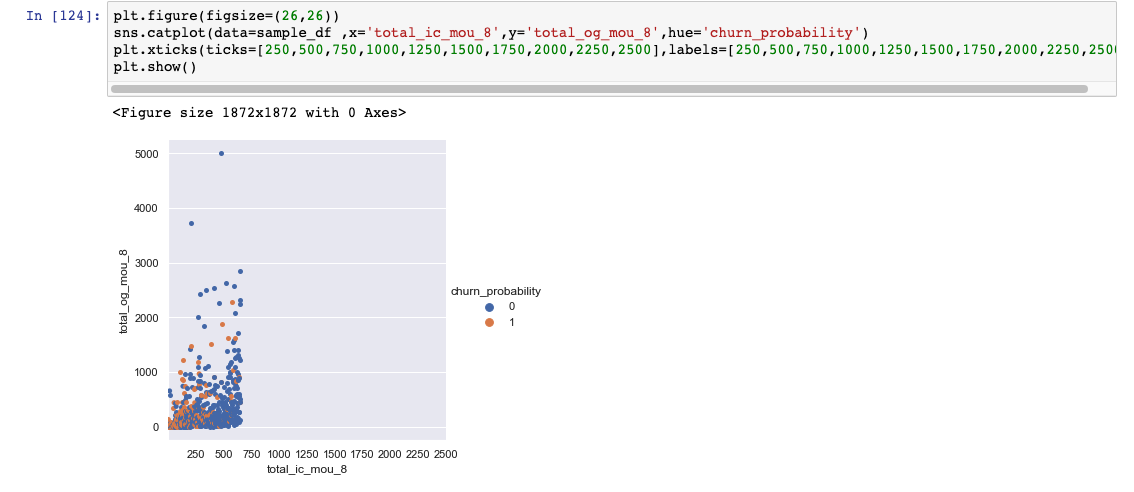

<font color="blue"> From the above scatter plot of variable 'total_ic_mou_8' against 'total_og_mou_8', we can see that telecom users who have had less incoming and less outgoing calls in the month of August have churned - s it indicates those users are NOT actively using the telecom service.<br>

Comparatively, people with high incoming calls & outgoing calls are less likely to churn - as it indicates those users are still actively using the telecom service.
</font>

In [622]:
train_df_copy['arpu_8'].describe()

count    69999.000000
mean       278.858826
std        351.924315
min       -945.808000
25%         84.095000
50%        192.234000
75%        369.909000
max      33543.624000
Name: arpu_8, dtype: float64

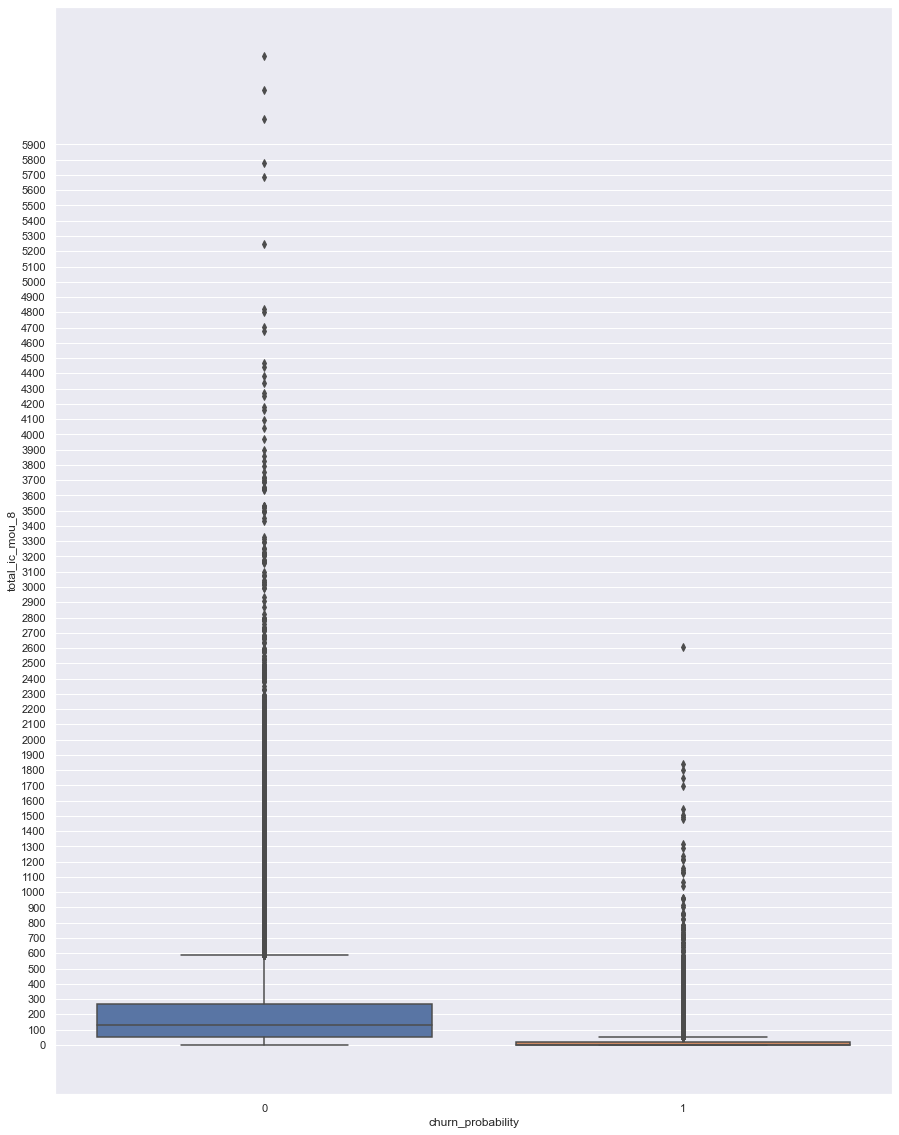

In [623]:
sample1= train_df_copy[train_df_copy['total_ic_mou_8'] < 7000]
sns.set(rc={'figure.figsize':(15,20)})
sns.boxplot(x="churn_probability", y="total_ic_mou_8", data=sample1)
plt.yticks(ticks=np.arange(0,6000,100),
           labels=np.arange(0,6000,100))
plt.show()

<font color="blue"> 
Form the above boxplot, it is clearly evident that Telecom users who have NOT CHURNED - They have high mean/average time of Total incoming MOU (Minutes of Usage) for month of AUGUST compared to Telecom users who have CHURNED.
    <br>
Thus, if a user has low Total incoming MOU for past single/couple of months, there is a high probability that user may churn and telecom operator should prevent churning by providing better plans, additional discounts on recharge, etc,
</font>

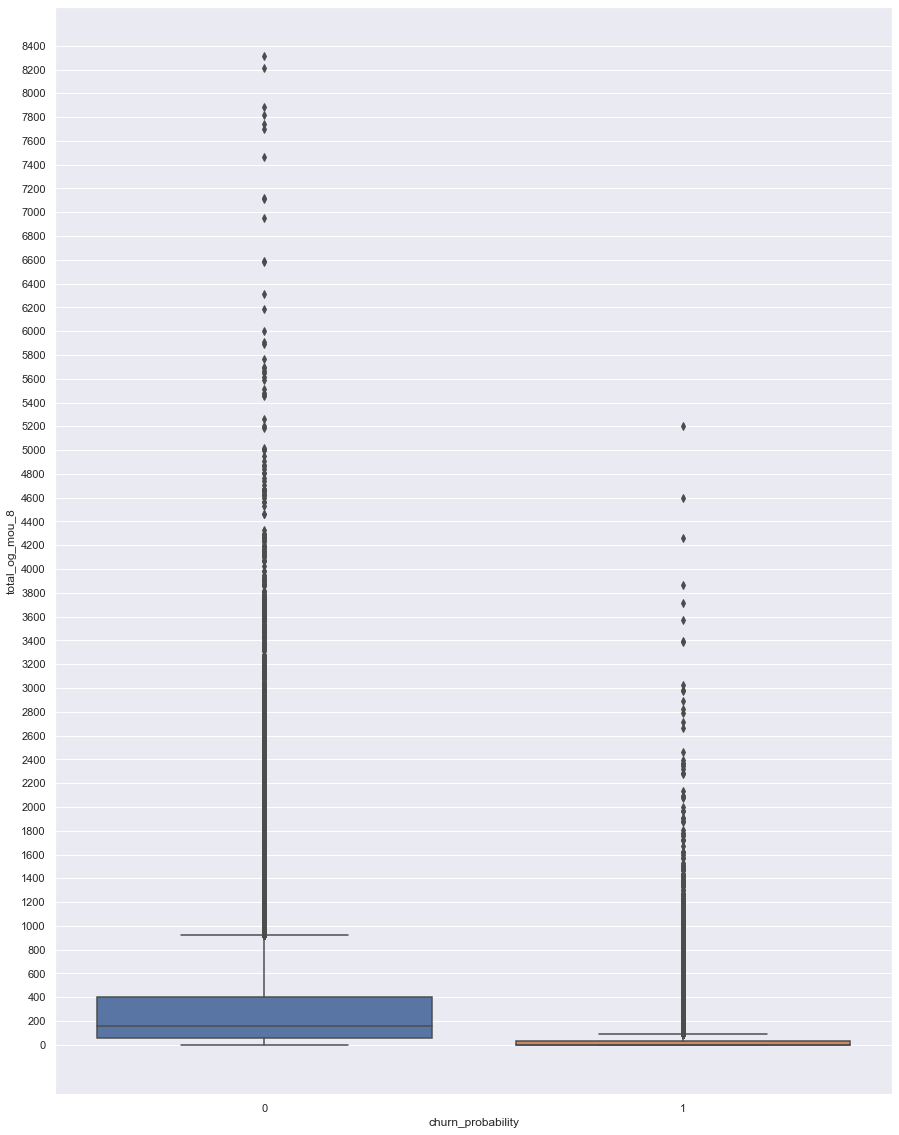

In [624]:
sample2= train_df_copy[train_df_copy['total_og_mou_8'] < 9500]
sns.set(rc={'figure.figsize':(15,20)})
sns.boxplot(x="churn_probability", y="total_og_mou_8", data=sample2)
plt.yticks(ticks=np.arange(0,8500,200),
           labels=np.arange(0,8500,200))
plt.show()

<font color="blue"> 
Form the above boxplot, it is clearly evident that Telecom users who have NOT CHURNED - They have high mean/average time of Total Outgoing MOU (Minutes of Usage) for month of AUGUST compared to Telecom users who have CHURNED.
    <br>
    
Thus, if a user has low Total Outgoing MOU for past single/couple of months, there is a high probability that user may churn and telecom operator should prevent churning by providing better plans, additional discounts on recharge, etc,
</font>

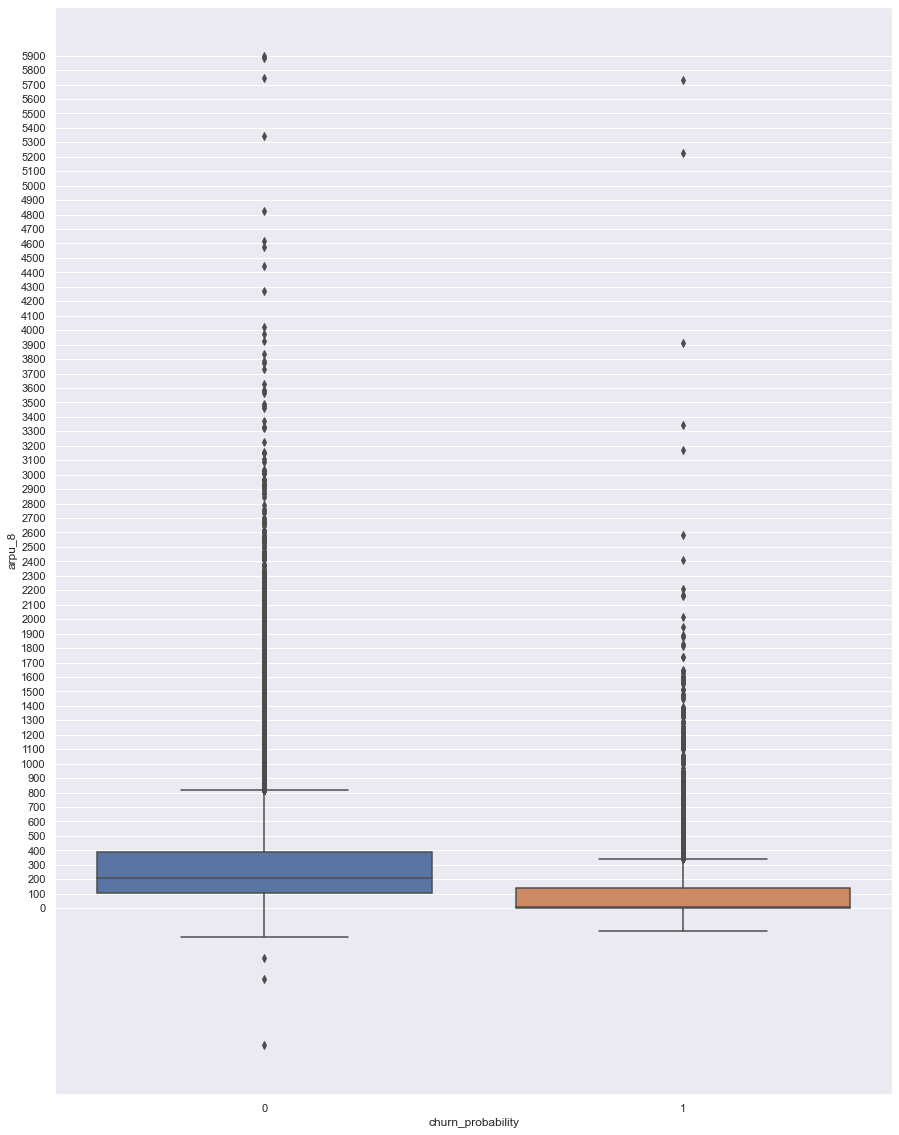

In [625]:
sample3= train_df_copy[train_df_copy['arpu_8'] < 6000]
sns.set(rc={'figure.figsize':(15,20)})
sns.boxplot(x="churn_probability", y="arpu_8", data=sample3)
plt.yticks(ticks=np.arange(0,6000,100),
           labels=np.arange(0,6000,100))
plt.show()

<font color = "blue"> 
From above box plot, it is clearly evdient that arpu_8 (Average revenue per user in month of August) is higher for retained customer customers, compared to those who have churned.

<br>
It sounds intuitive as well to understand, as customer who have churned will not be actively using the teclcom service within past few weeks/months before churning and would be looking forward to using other telecom operators.
    
</font>

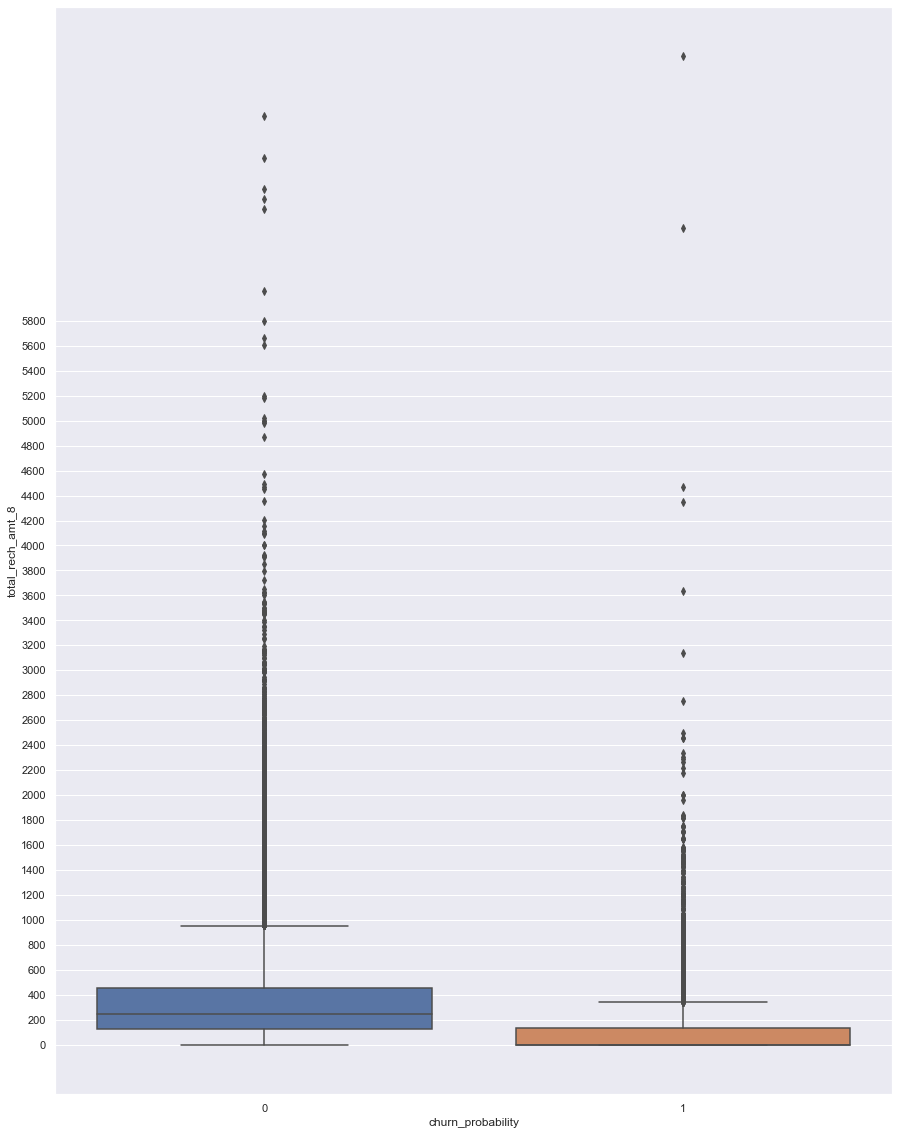

In [626]:
sample4 = train_df_copy[train_df_copy['total_rech_amt_8'] < 8000]
sns.set(rc={'figure.figsize':(15,20)})
sns.boxplot(x="churn_probability", y="total_rech_amt_8", data=sample4)
plt.yticks(ticks=np.arange(0,6000,200),
           labels=np.arange(0,6000,200))
plt.show()

<font color="blue">
From above box plot it is clearly evident that churned customers are not spening much on recharge plans, as the average recharge amount for churned customers is considerably low compared to retained customers.  
    <br>
Thus, telecom company should try to lookout for customers with smaller recharges and tempt them to do bigger recharges by providing some additional benefits / addons / discounts, etc.
</font>

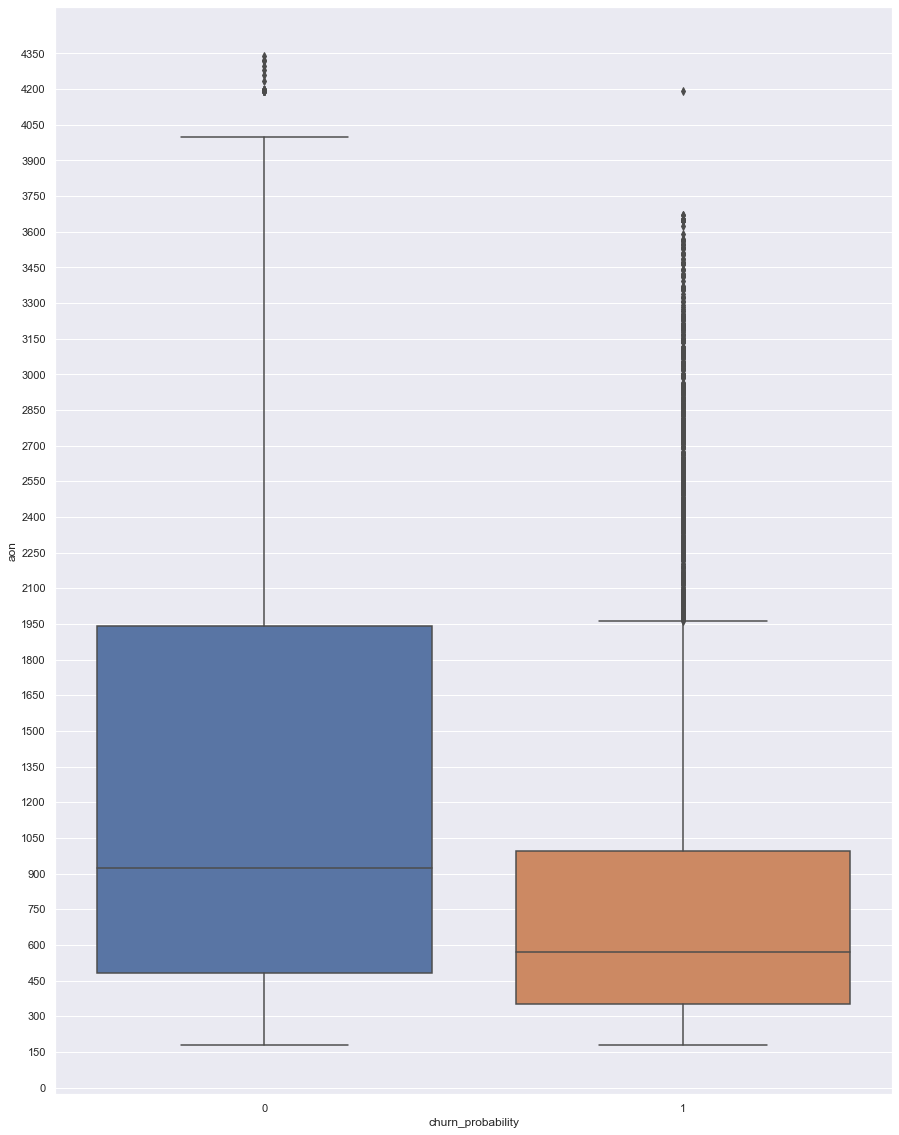

In [627]:
#aon
sns.set(rc={'figure.figsize':(15,20)})
sns.boxplot(x="churn_probability", y="aon", data=train_df_copy)
plt.yticks(ticks=np.arange(0,4500,150),
           labels=np.arange(0,4500,150))
plt.show()

<font color="blue">
From above box plot, it is clearly evident that average aon(Customer's Age on the Network) is higher for retainied customers compared to churned customers.
    
<br>
This implies a pattern - If a customer can stay long enough for more than few months (Example : 2 yrs+), he/she is more likely to stay on as he has gained enough confidence and satisfaction.

<br> Hence, telecom company should analyse these average aon numbers and persuade customers to stay with them more than average numbers by preoving discounts/offers initially, so that customer will gain confience in the brand & that will indicate lesser chances of customer churning.
    
</font>

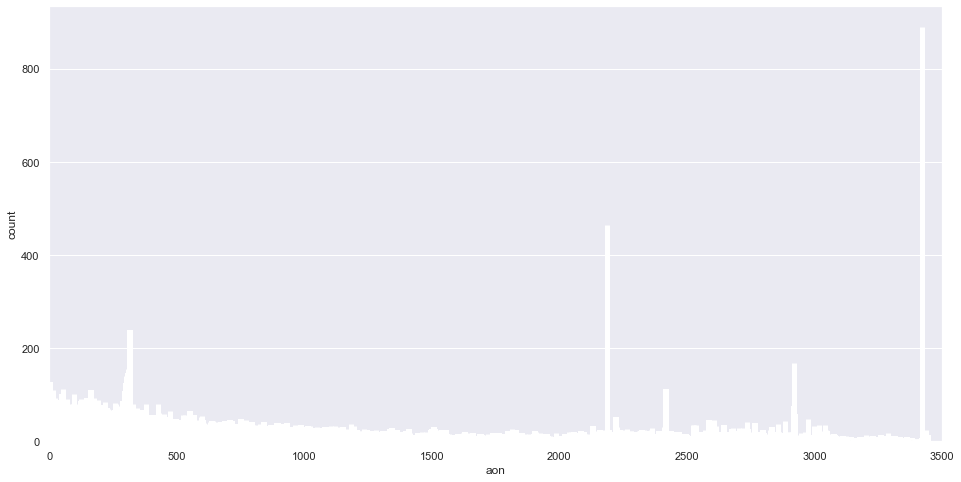

In [628]:
sns.set(rc={'figure.figsize':(16,8)})
#sns.set_theme(style="darkgrid")
sns.countplot(train_df_copy["aon"], linewidth=5, palette="Set3")
plt.xticks(ticks=np.arange(0,4000,500),
           labels=np.arange(0,4000,500))
plt.show()

## Categorical scatterplots

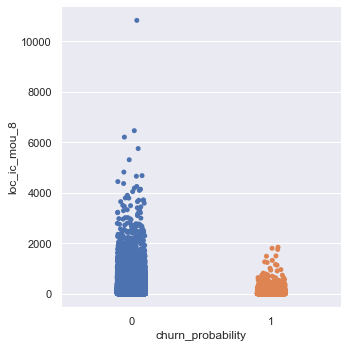

In [629]:
sns.catplot(x="churn_probability", y="loc_ic_mou_8", data=train_df_copy)

<font color="blue">
    From above plot, we can observe that retained customers have higher Incoming call MOU(Minutes of Usage) for the month of August compared to churned customers.
    
</font>

In [630]:
#loc_ic_t2t_mou_8
#loc_ic_t2m_mou_8
train_df_copy['loc_ic_t2t_mou_8'].describe()

count    66296.000000
mean        47.256388
std        141.249368
min          0.000000
25%          3.280000
50%         16.040000
75%         46.280000
max      10696.230000
Name: loc_ic_t2t_mou_8, dtype: float64

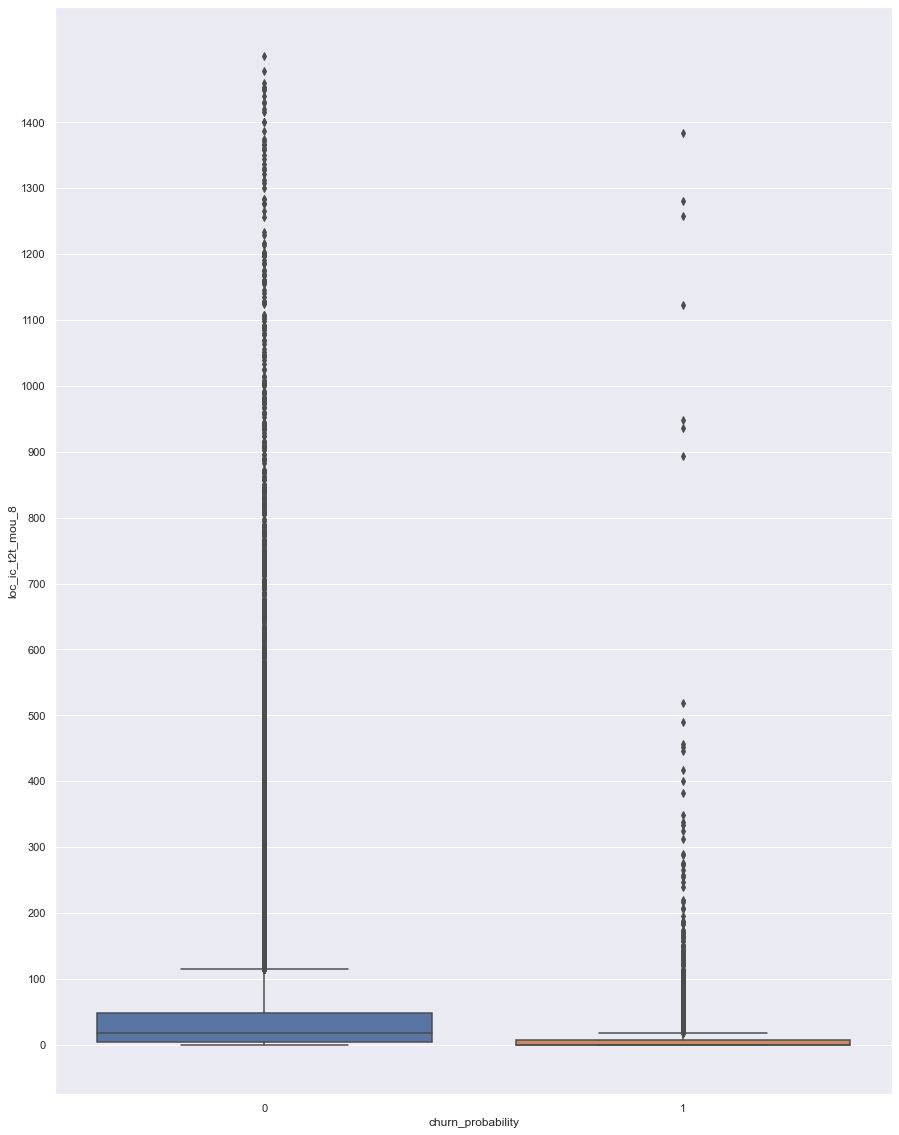

In [631]:
sample5 = train_df_copy[train_df_copy['loc_ic_t2t_mou_8'] < 1500]
sns.set(rc={'figure.figsize':(15,20)})
sns.boxplot(x="churn_probability", y="loc_ic_t2t_mou_8", data=sample5)
plt.yticks(ticks=np.arange(0,1500,100),
           labels=np.arange(0,1500,100))
plt.show()

<font color="blue">
From above plot, it is clearly evident that Total incoming T2T MOU time(Operator T to Operator T i.e. same operator) is higher for retained customers.
    
<br>

This implies that retained customers are doing lot of calls with people with same operator and thus maybe they are using benefits - as Rs/min charge for T2T is more compared to Rs/min charge for T2M.
    
</font>

In [632]:
train_df_copy['loc_ic_t2m_mou_8'].describe()

count    66296.000000
mean       108.154731
std        166.223461
min          0.000000
25%         18.940000
50%         58.210000
75%        134.380000
max       6274.190000
Name: loc_ic_t2m_mou_8, dtype: float64

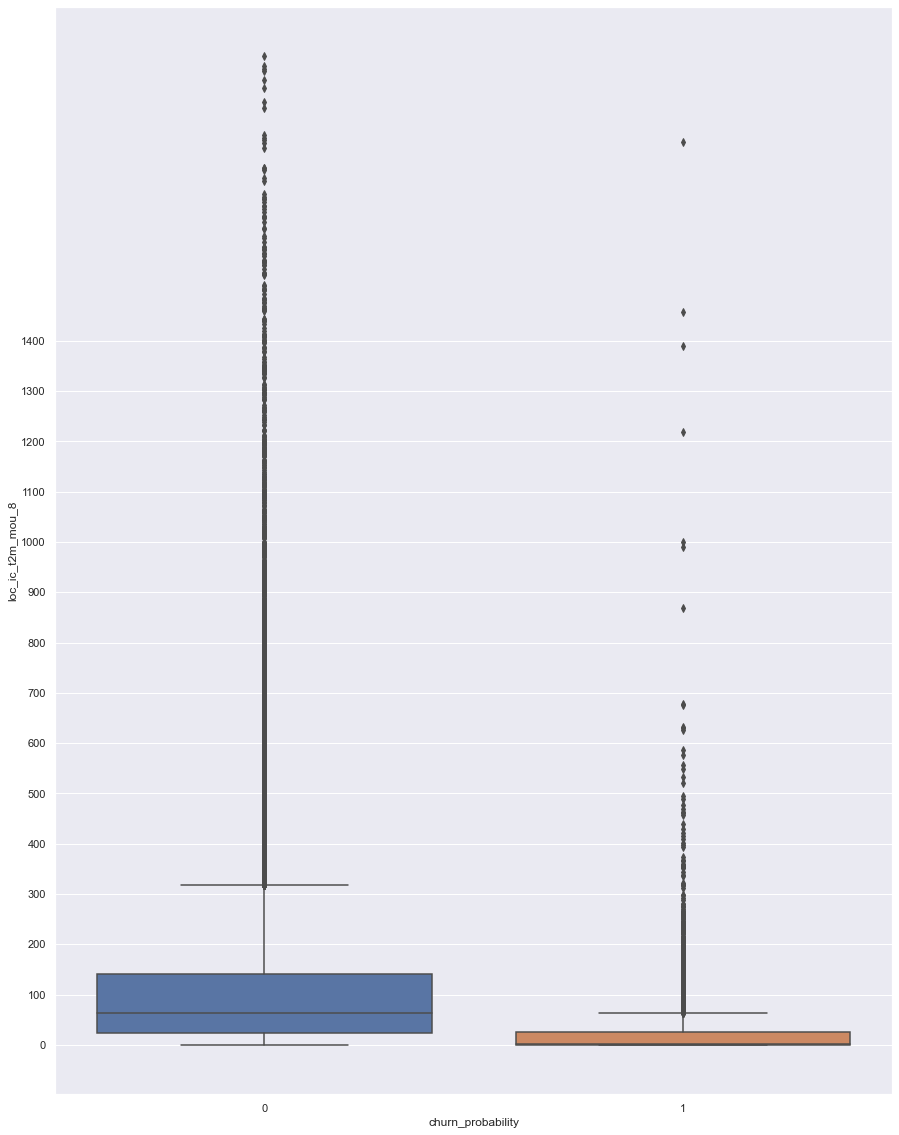

In [633]:
sample6 = train_df_copy[train_df_copy['loc_ic_t2m_mou_8'] < 2000]
sns.set(rc={'figure.figsize':(15,20)})
sns.boxplot(x="churn_probability", y="loc_ic_t2m_mou_8", data=sample6)
plt.yticks(ticks=np.arange(0,1500,100),
           labels=np.arange(0,1500,100))
plt.show()

<font color="blue">
From above plot, it is clearly evident that Total incoming T2M MOU time(Operator T to other Operator M) is higher for retained customers.
    
<br>
This implies that retained customer are actually using more calling features compared to churned customers. they should try to launch new features like 'VOICE over WIFI'.
</font>

In [634]:
train_df_copy['last_day_rch_amt_8'].describe()

count    69999.000000
mean        62.489478
std        101.996729
min          0.000000
25%          0.000000
50%         30.000000
75%        130.000000
max       4449.000000
Name: last_day_rch_amt_8, dtype: float64

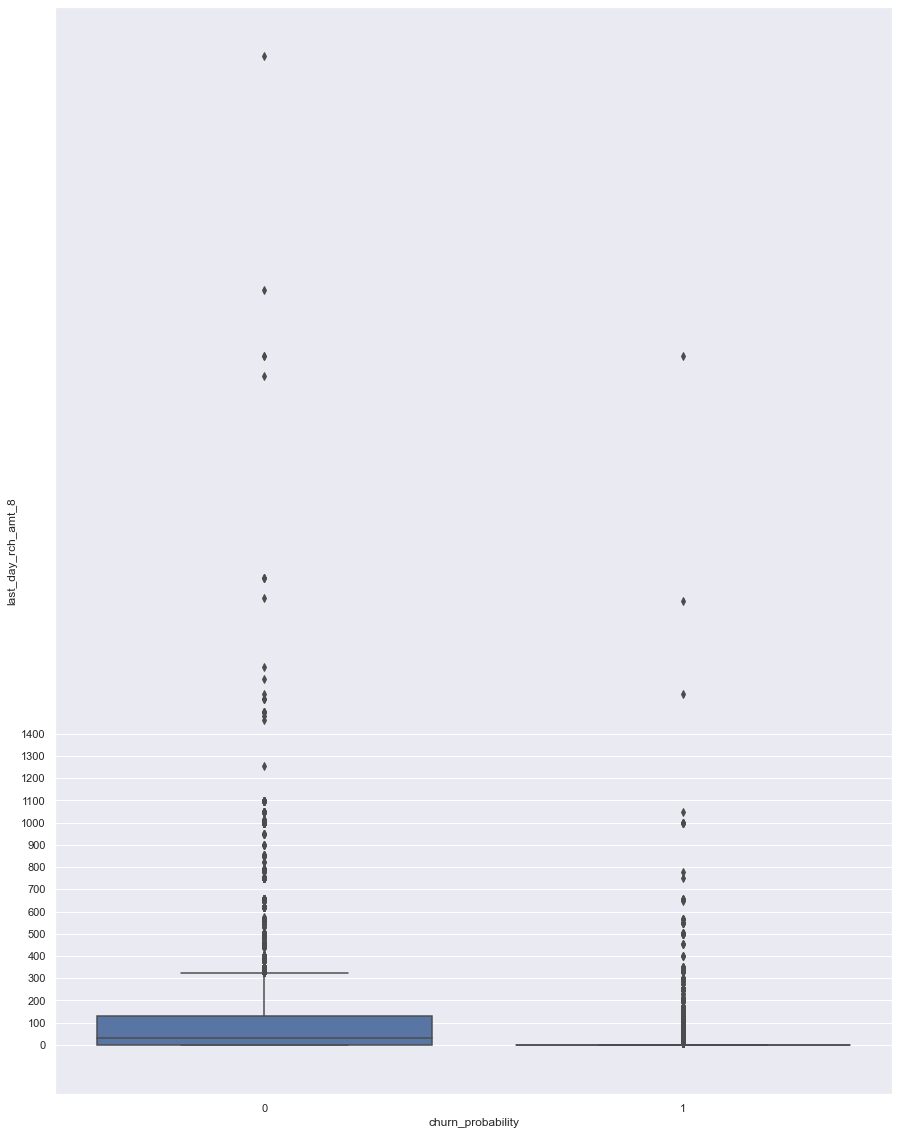

In [635]:
sns.set(rc={'figure.figsize':(15,20)})
sns.boxplot(x="churn_probability", y="last_day_rch_amt_8", data=train_df_copy)
plt.yticks(ticks=np.arange(0,1500,100),
           labels=np.arange(0,1500,100))
plt.show()

<font color="blue">
From the above boxplot, we can visualise that most of the recharges are happening on the last day of the month.
    
<br>

Company should take some measure that can encourage customers to recharge well in advance. But this also implies one pattern that retained customers DO recharge on last day of the month after all, because they want to avoid disruption to their service.

</font>

In [636]:
print(datetime.now())

2022-03-16 22:38:56.322773


# Objective 3 - Comparing different Model evaluation metrics

In [637]:
model_comparison_df

,Model_name,Training accuracy,Validation accuracy,Training Sensitivity,Validation Sensitivity,Training Specificity,Validation Specificity,Training Precision,Validation Precision,Training Recall,Validation Recall,Training ROC score,Validation ROC score,Training F1 score,Validation F1 score
0,Logistic Regression,0.916901,0.921657,0.345131,0.360911,0.982539,0.984376,0.694094,0.720958,0.345131,0.360911,0.663835,0.672644,0.461023,0.481023
1,Gradient Boost,0.984130,0.926301,0.857932,0.509592,0.998617,0.972910,0.986151,0.677831,0.857932,0.509592,0.928274,0.741251,0.917584,0.581793
2,Basic Random Forest,0.999974,0.919245,0.999749,0.297962,1.000000,0.988735,1.000000,0.747368,0.999749,0.297962,0.999874,0.643348,0.999874,0.426061
3,Ada Boost,0.913231,0.914179,0.398092,0.380695,0.972367,0.973848,0.623183,0.619512,0.398092,0.380695,0.685230,0.677272,0.485832,0.471593
4,Balanced Random Forest,0.889555,0.853205,1.000000,0.826139,0.876877,0.856233,0.482500,0.391255,1.000000,0.826139,0.938438,0.841186,0.650927,0.531021
5,SMOTE Random Forest,1.000000,0.944377,1.000000,0.953657,1.000000,0.935094,1.000000,0.936301,1.000000,0.953657,1.000000,0.944375,1.000000,0.944899


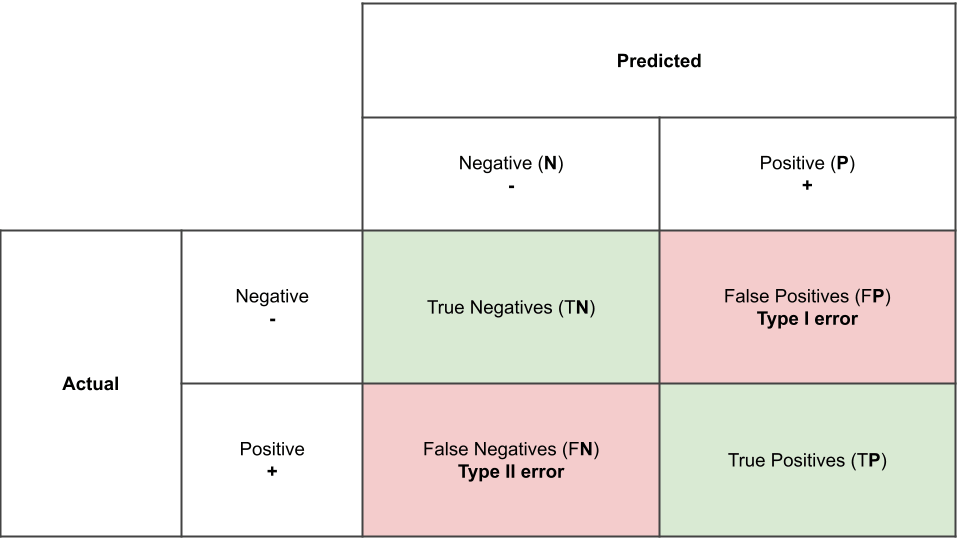

#### <font color="green"> Default goal/objective - Case Study metric evaluation is Accuracy </font>
however, accuracy may not be the best metric in such cases, although it depends a lot in the actual use case. But depending on business objective, precision, recall and F1 score can also turn out to bet better metrics (as  per the requirement/use case)


#### <font color="green">Potential Telecom churning goal/objective - Reduce number of False negatives.</font>
<b>Reasoning - </b><br> If we have more False Negative predicted for our model, it means that model is predicting 1(Churn customer) as as 0(Non-churn customer). having this high will imply not understanding potential churned customers and that would mean telecom company loss. If these are correctly identified, it will ensure Telecom company can take required measures like offering recharge discounts/coupons/additional benefits etc to retain the customer and avoid churning in first place.<br>
<b>Proposed Evaluation metric - </b><br> Recall will be a good measure as it gives ratio of (TP)/(TP+FN). Higher the recall means proportion of False Negative is lesser.<br>
F1-score can also be a good metric as it takes into account both precision and recall.<br>
<b>Proposed Model for prediction - </b><br>  SMOTE with Random Forest

In [638]:
model_comparison_df[['Model_name','Training Recall','Validation Recall']]

,Model_name,Training Recall,Validation Recall
0,Logistic Regression,0.345131,0.360911
1,Gradient Boost,0.857932,0.509592
2,Basic Random Forest,0.999749,0.297962
3,Ada Boost,0.398092,0.380695
4,Balanced Random Forest,1.000000,0.826139
5,SMOTE Random Forest,1.000000,0.953657


#### <font color="green"><font color="green">Potential Telecom churning goal/objective - Reduce number of False Positive</font>
<b>Reasoning - </b><br> If we have more False Positive predicted for our model, it means that model is predicting 0(Retained customer) as as 1(Churn customer). Having this high will imply overestimating potential churned customers & company would tend to give more offers (to avoid churning) even though they are not potential chruners . While having it high is not going to ame us lose any churners, but company would like to get accurate predictions - so that discount offers are given only to potential churners and not most of them.<br>
<b>Proposed Evaluation metric - </b><br> Precision will be a good measure as it gives ratio of (TP)/(TP+FP). Higher the precision means proportion of False Positive is lesser.<br>
F1-score can also be a good metric as it takes into account both precision and recall.<br>
<b>Proposed Model for prediction - </b><br> SMOTE with Random Forest

In [639]:
model_comparison_df[['Model_name','Training Precision','Validation Recall']]

,Model_name,Training Precision,Validation Recall
0,Logistic Regression,0.694094,0.360911
1,Gradient Boost,0.986151,0.509592
2,Basic Random Forest,1.000000,0.297962
3,Ada Boost,0.623183,0.380695
4,Balanced Random Forest,0.482500,0.826139
5,SMOTE Random Forest,1.000000,0.953657


# Objective 4 - Recommend strategies to manage customer churn

<b>Below are some strategies to manage Customer Churn basis on Data visulaisation analysis and after identfication of most important variables:</b>
<ul>
    <li>If a user has low Total incoming MOU/Toytal otgoing MOU for past single/couple of months, there is a high probability that user may churn and telecom operator should prevent churning by <u>providing better recharge plans by providing more talktime on plan or providing better & new services like WiFi Calling that can improve customer experience.</u></li><br>
    <li><u>Introduce special plans for calling that can provide maximum talktime deal and can catch the attention of the userbase.</u></li><br>
    <li>It is clearly evdient that arpu_8 (Average revenue per user in month of August) is higher for retained customer customers, compared to those who have churned. It sounds intuitive as well to understand, as customer who have churned will not be actively using the teclcom service within past few weeks/months before churning and would be looking forward to using other telecom operators. Thus, <u>Telecom company should start to analyse the Avg revenue per user for past few months and provide lucrative offers/deal/services, so that chances of customer retention increase.</u></li><br>
    <li>It is clearly evident that churned customers are not spening much on recharge plans, as the average recharge amount for churned customers is considerably low compared to retained customers.  Thus, <u>telecom company should try to lookout for customers with smaller recharges and tempt them to do bigger volume recharges by providing some additional benefits / addons / discounts on bigger/bi-yearly & annual plans. Example, If a quarterly plan costs 700 Rs, price the annual plan Rs.2500 instead of Rs.2800 (provided management is okay with such discounts). As customer usually prefer the Telecom company that provides them the best deal/service.</u></li><br>
    <li>It is clearly evident that average aon(Customer's Age on the Network) is higher for retainied customers compared to churned customers.This implies a pattern - If a customer can stay long enough for more than few months (Example : 2 yrs+), he/she is more likely to stay on as he has gained enough confidence and satisfaction.<u>Hence, telecom company should analyse these average aon numbers and persuade customers to stay with them more than average numbers by preoving discounts/offers initially, so that customer will gain confience in the brand & that will indicate lesser chances of customer churning.</u></li><br>
    <li>It can be concluded from Data visualisation  that most of the recharges are happening on the last day of the month. <u>Company should take some measure that can encourage customers to recharge well in advance.</u> But this also implies one pattern that retained customers DO recharge on last day of the month after all, because they want to avoid disruption to their service.</li><br>
    <li> Introduce special plans for Internet recharge plans(2G/3G/4G) as there is currently lot of data consumption trend with emergence of social media. <u>Introducing data/internet plans cheaper or more lucrative than competition companies will reduce customer churn & infact attract customers.</u></li><br>
</ul>